In [14]:
import sys
from pathlib import Path
import os

# Add parent directory to path
notebook_path = Path(os.getcwd())
sys.path.insert(0, str(notebook_path.parent))

from bot.data import client
from bot.rules import *
from bot.config.utils import read_tickers, read_config

tickers = read_tickers()

In [74]:
import pickle
from bot.data import load_ohlcv
from bot.rules.signal_filter import breakout, volume_breakout
from bot.rules.execution_filter import upper_donchian_breach
import pandas as pd

start_str = "1 year ago UTC"

signal_filters = [breakout, volume_breakout]
signal_timeframe = "30m"

execution_filters = [upper_donchian_breach]
execution_timeframe = "5m"

reload = False

datas_signal = {}
datas_execution = {}
if reload:
    for ticker in tickers[:23]:

        print(f"Processing {ticker}...")

        df_signal = load_ohlcv(ticker, signal_timeframe, start_str)
        df_execution = load_ohlcv(ticker, execution_timeframe, start_str)

        datas_signal[ticker] = df_signal
        datas_execution[ticker] = df_execution

    with open('test_data.pkl', 'wb') as f:
        pickle.dump((datas_signal, datas_execution), f)
else: 
    with open('test_data.pkl', 'rb') as f:
        datas_signal, datas_execution = pickle.load(f)




In [75]:
config = read_config()

for ticker, df in datas_signal.items():
    signals = {}
    scores = {}
    for filter in signal_filters:
        signals[filter.NAME], scores[filter.NAME+'_score'] = filter.vec(df, **{k:config[k] for k in filter.REQUIRES})
    df = pd.concat([df, pd.concat(signals, axis=1), pd.concat(scores, axis=1)], axis=1)
    datas_signal[ticker] = df

for ticker, df in datas_execution.items():
    executions = {}
    scores = {}
    for filter in execution_filters:
        executions[filter.NAME], scores[filter.NAME+'_score'] = filter.vec(df, **{k:config[k] for k in filter.REQUIRES})
    df = pd.concat([df, pd.concat(executions, axis=1), pd.concat(scores, axis=1)], axis=1)
    datas_execution[ticker] = df

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


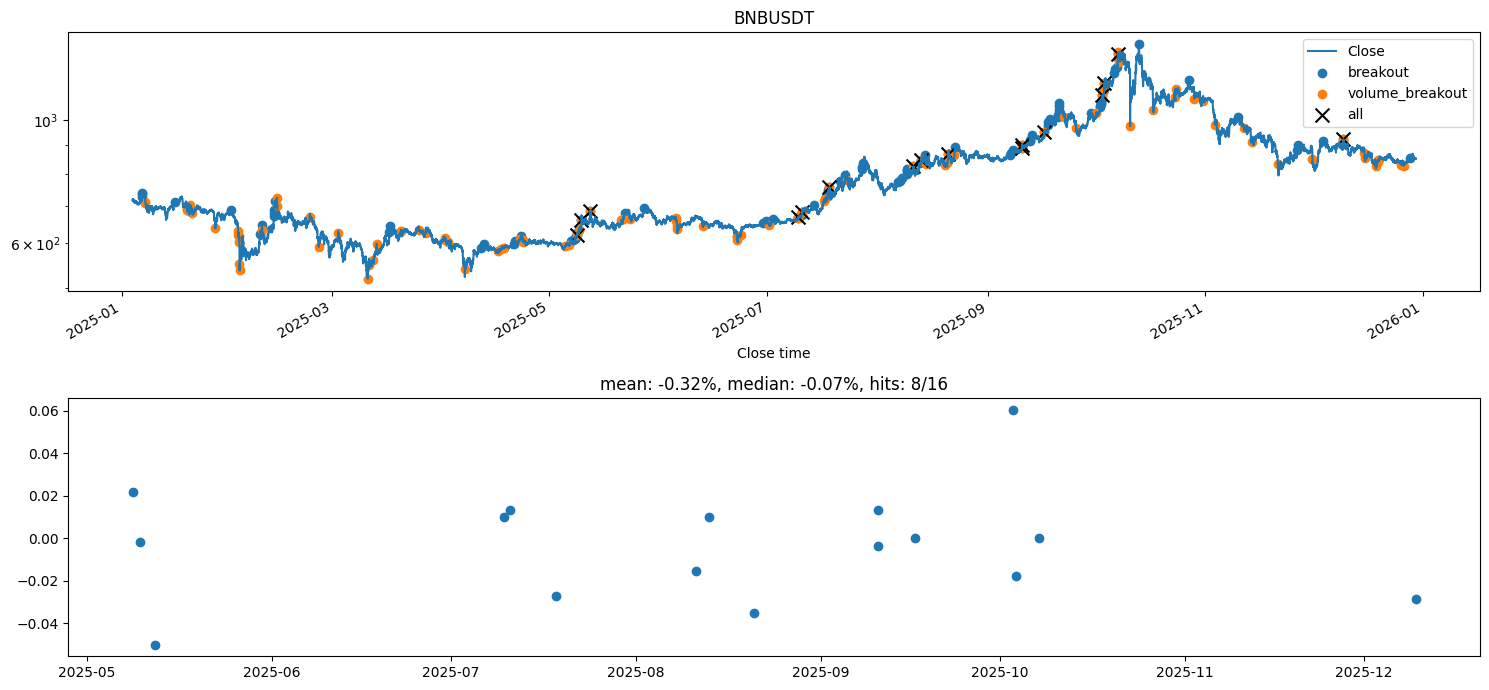

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


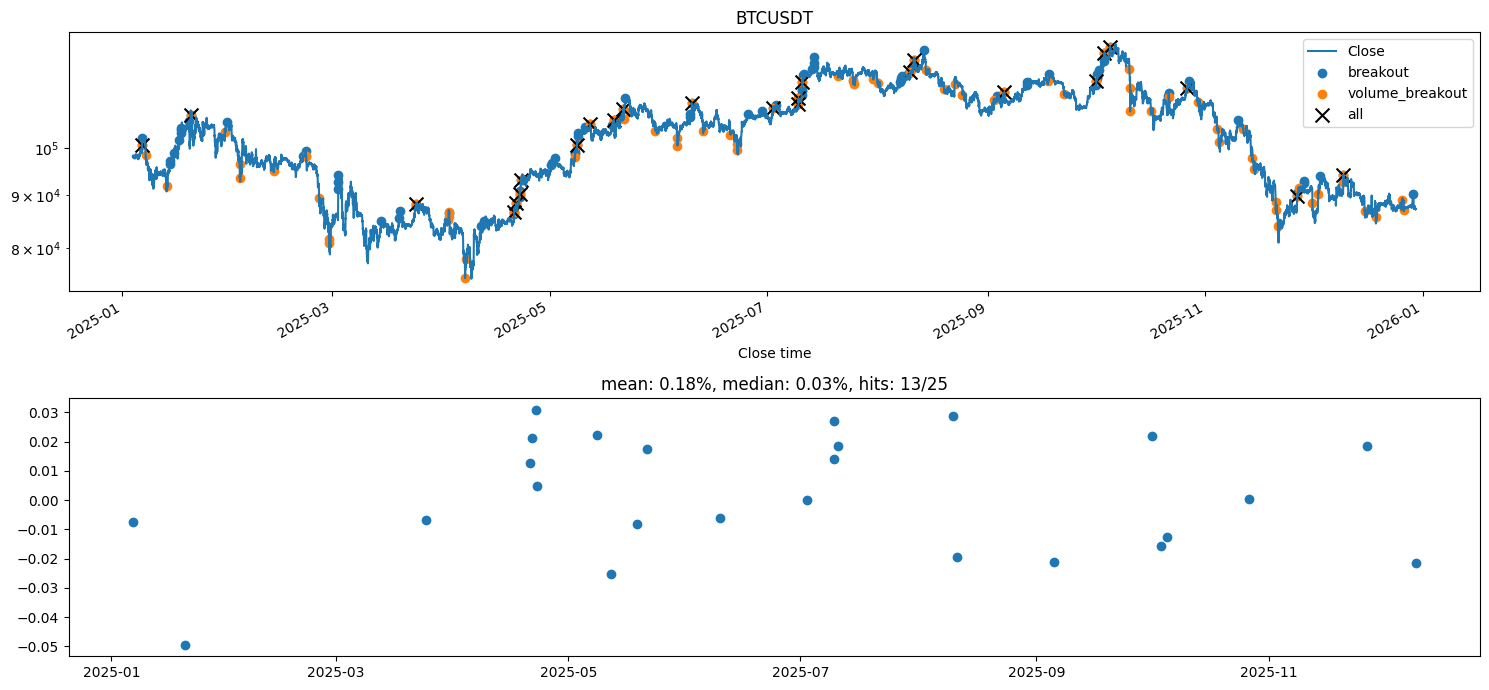

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


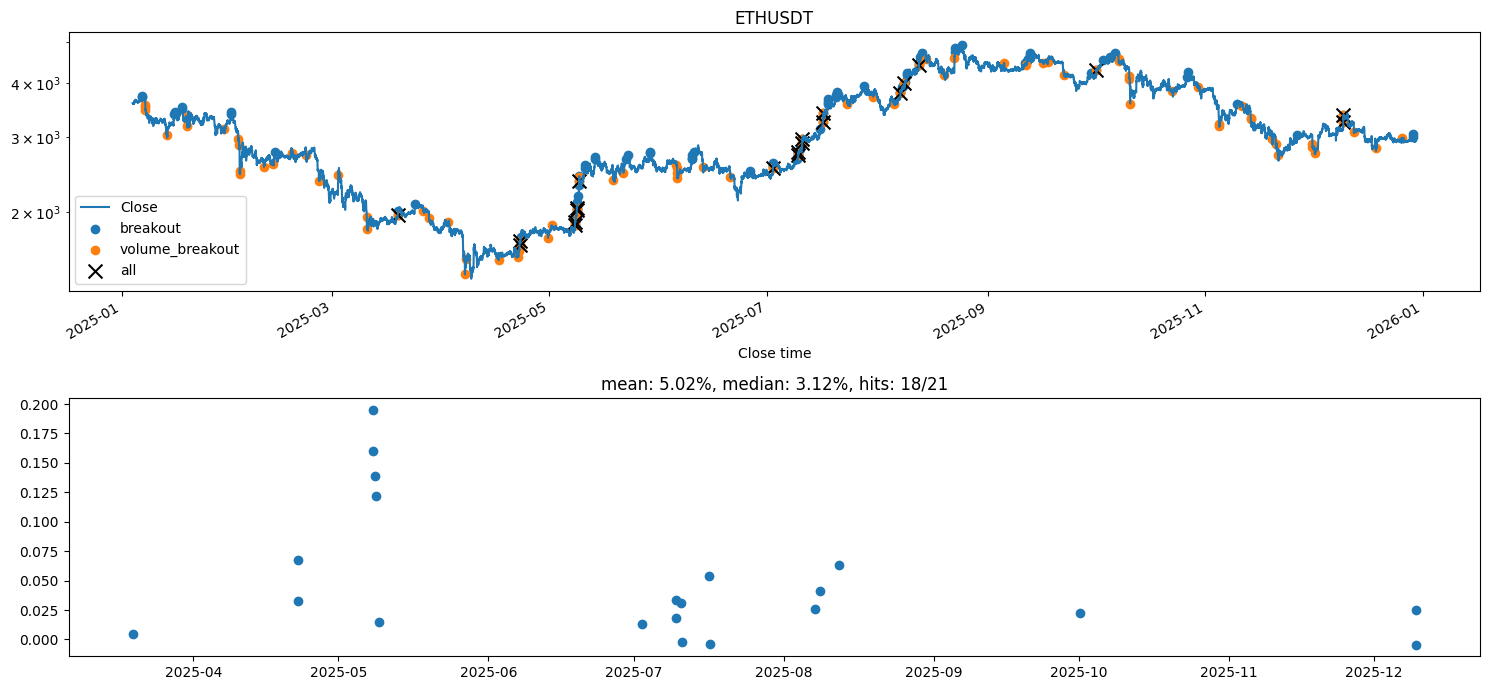

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


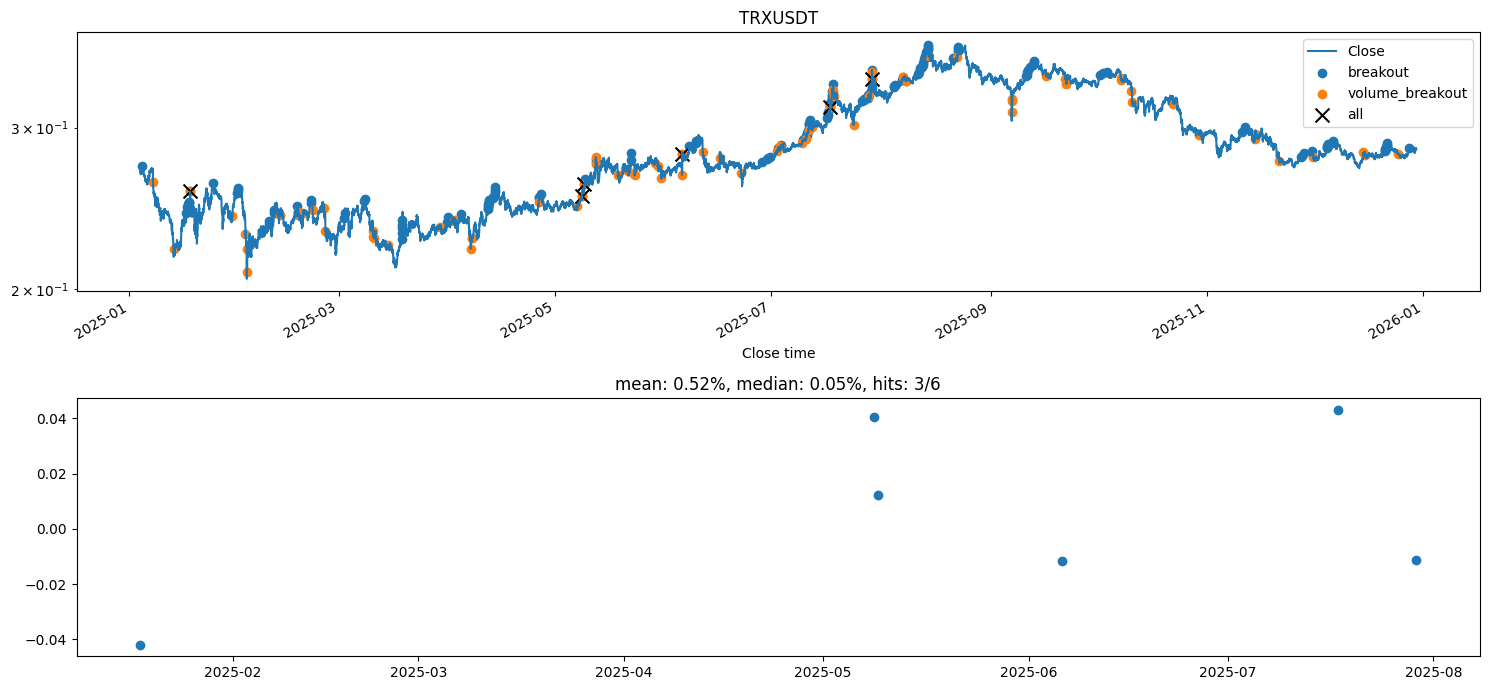

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


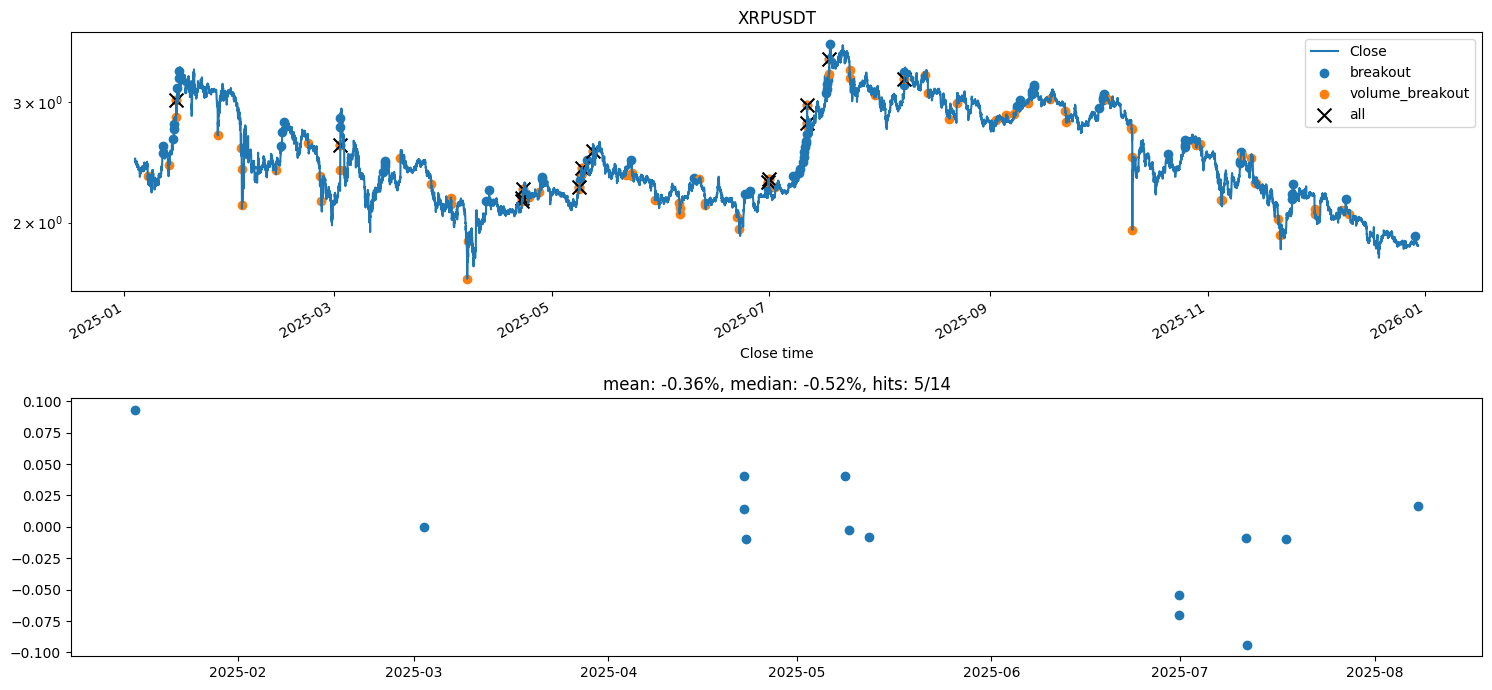

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


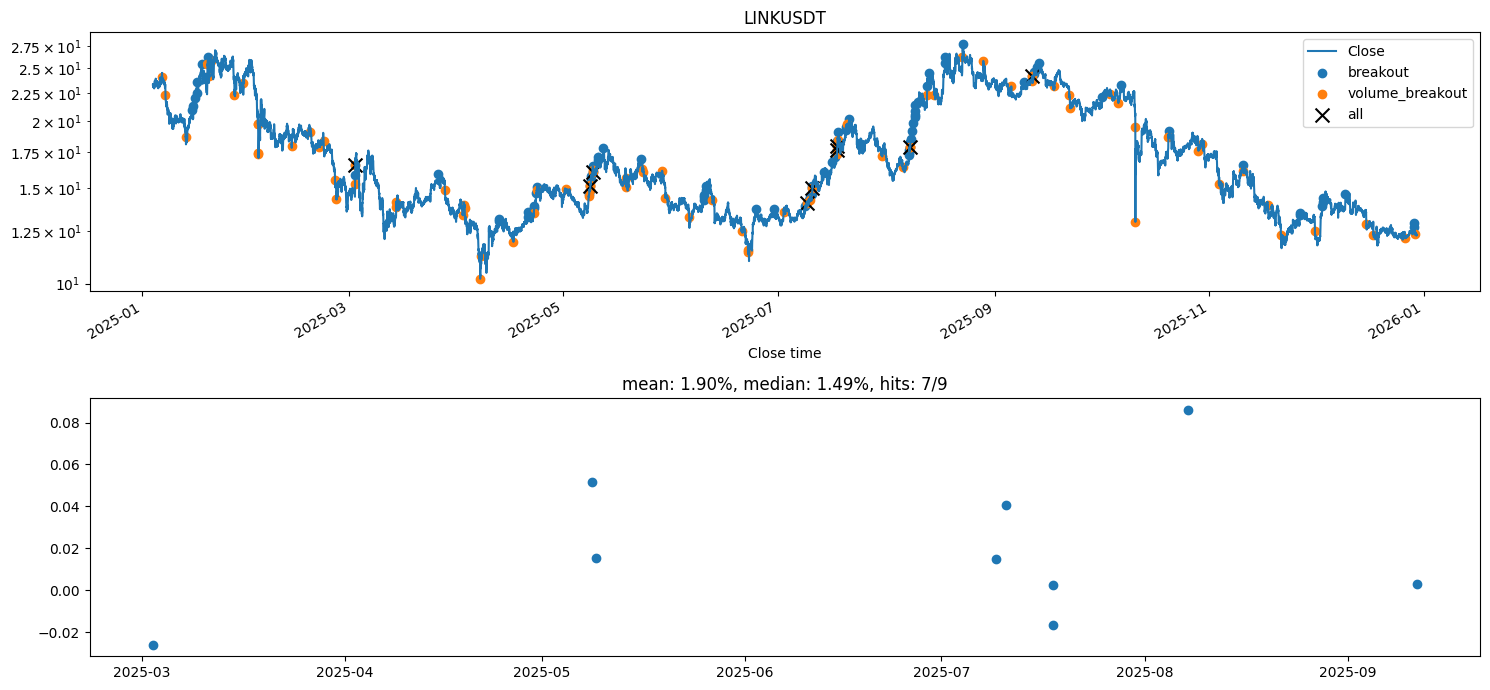

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


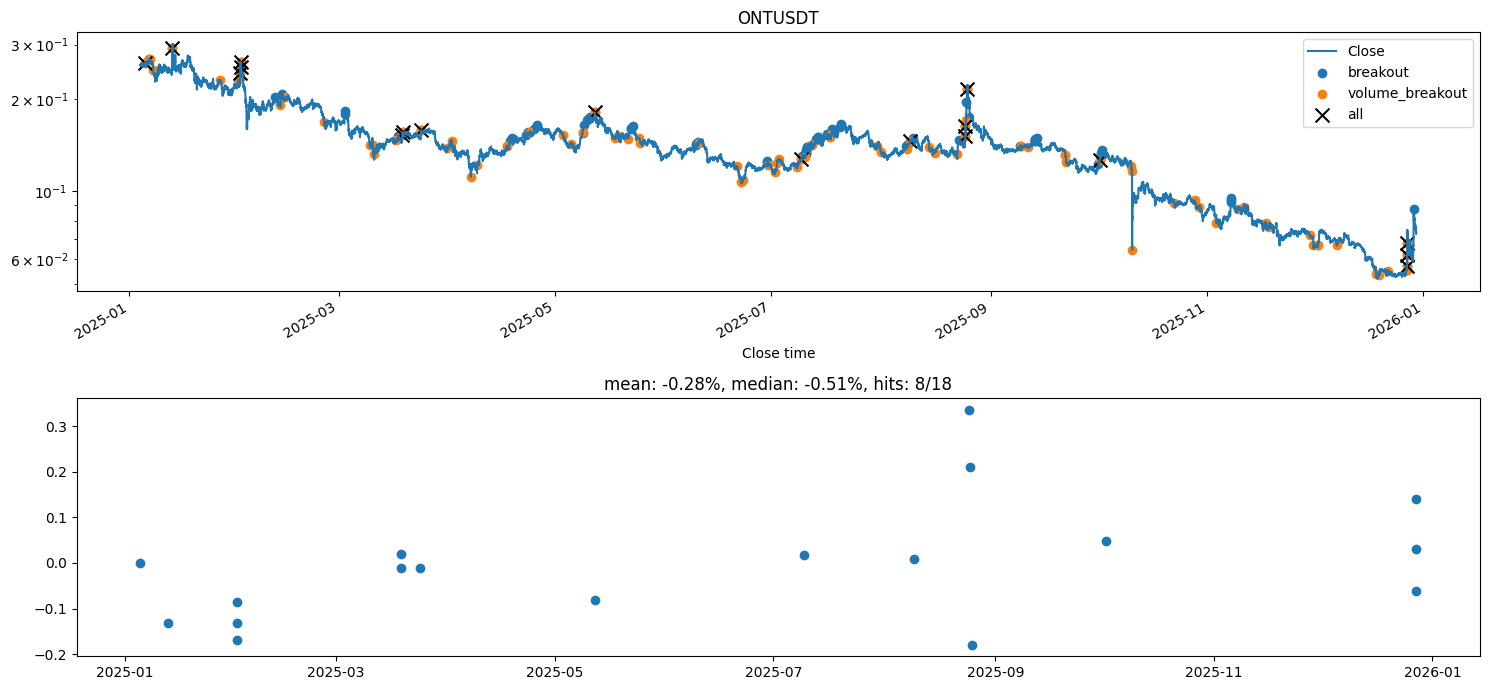

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


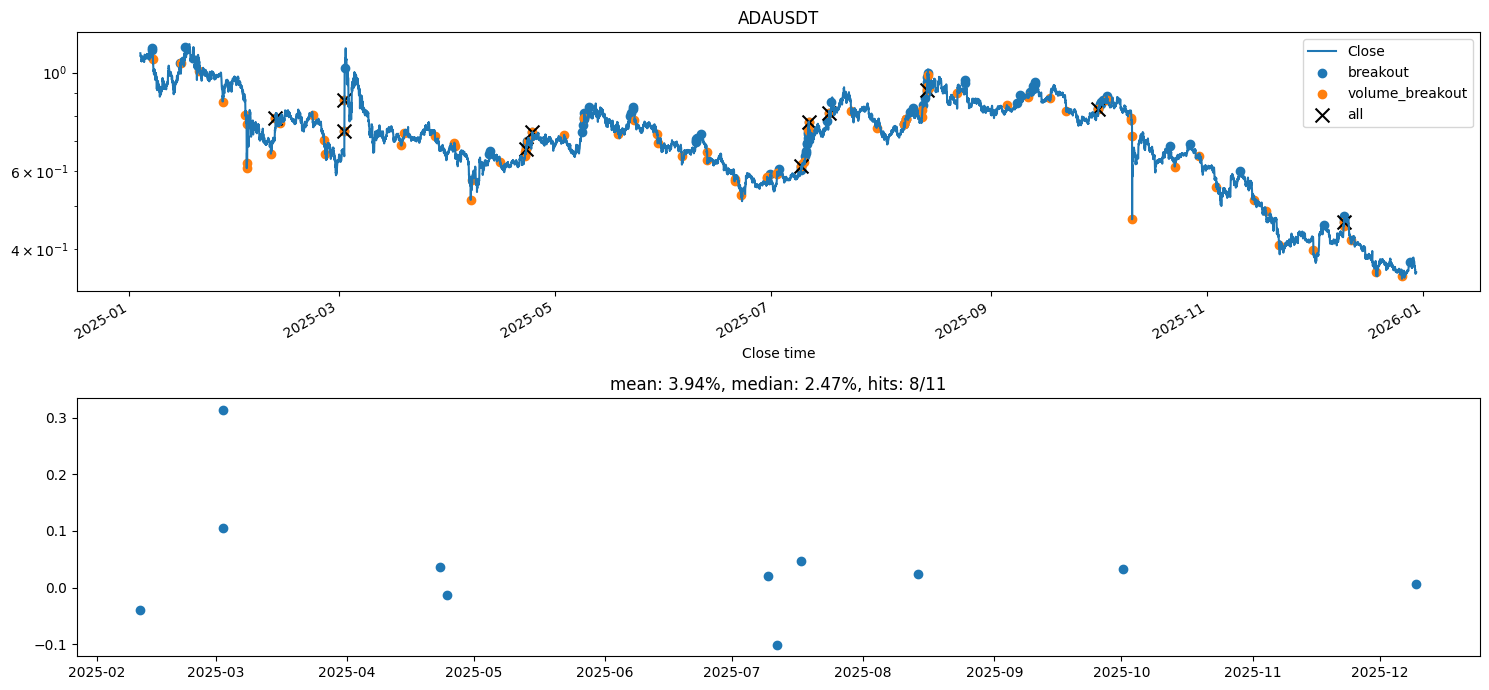

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


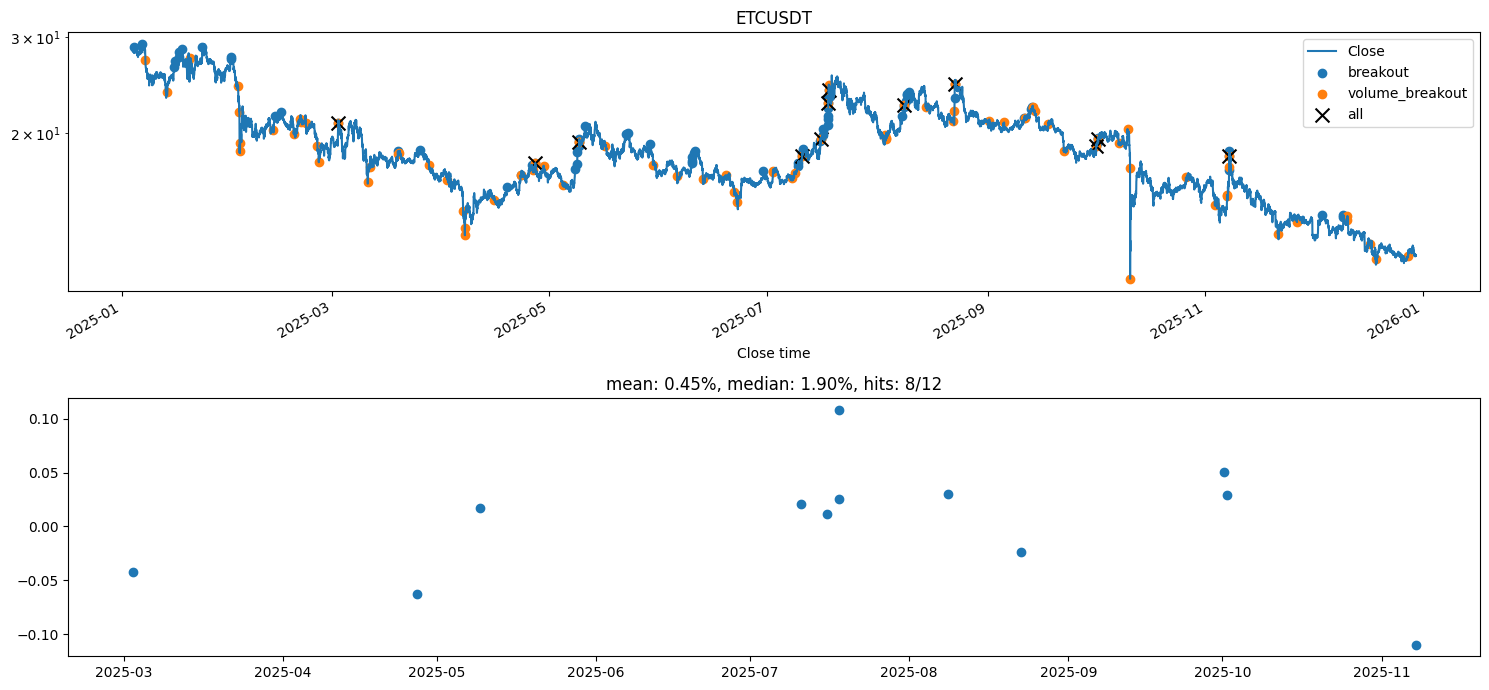

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


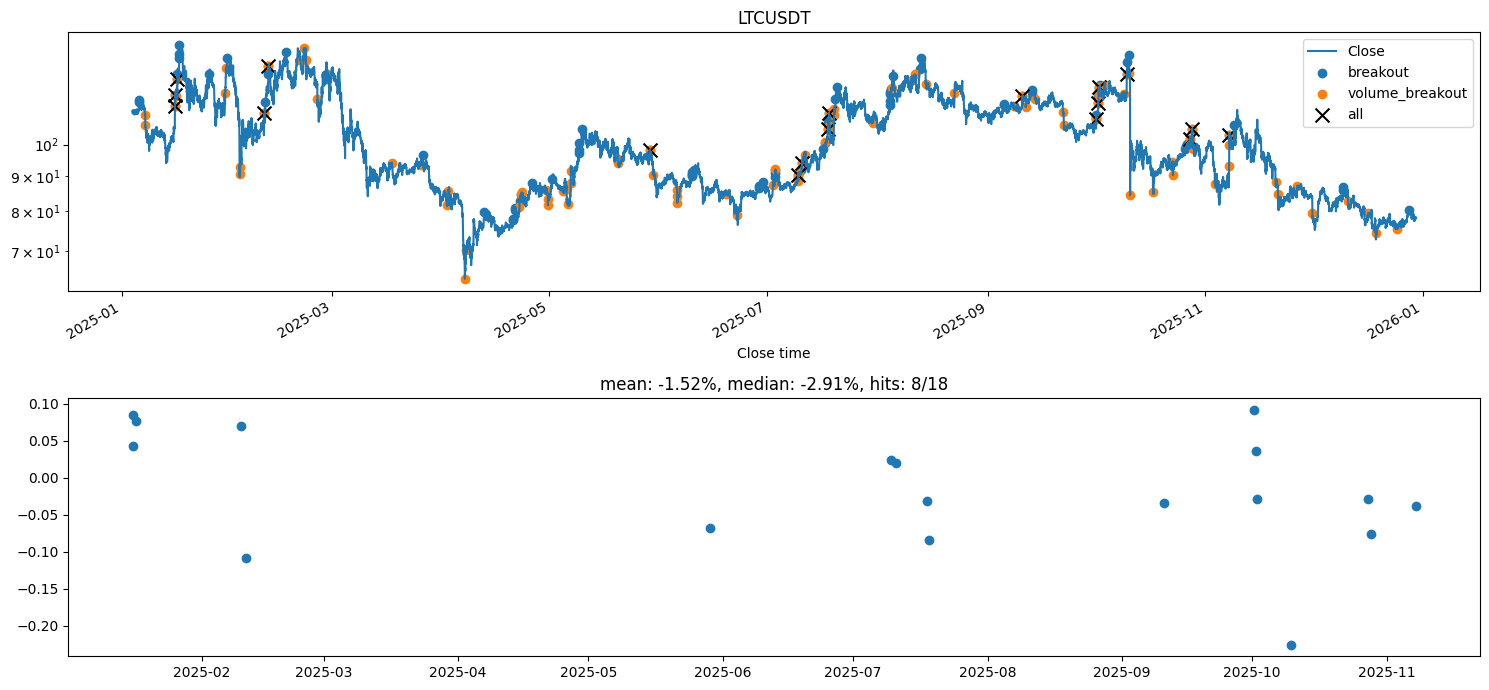

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


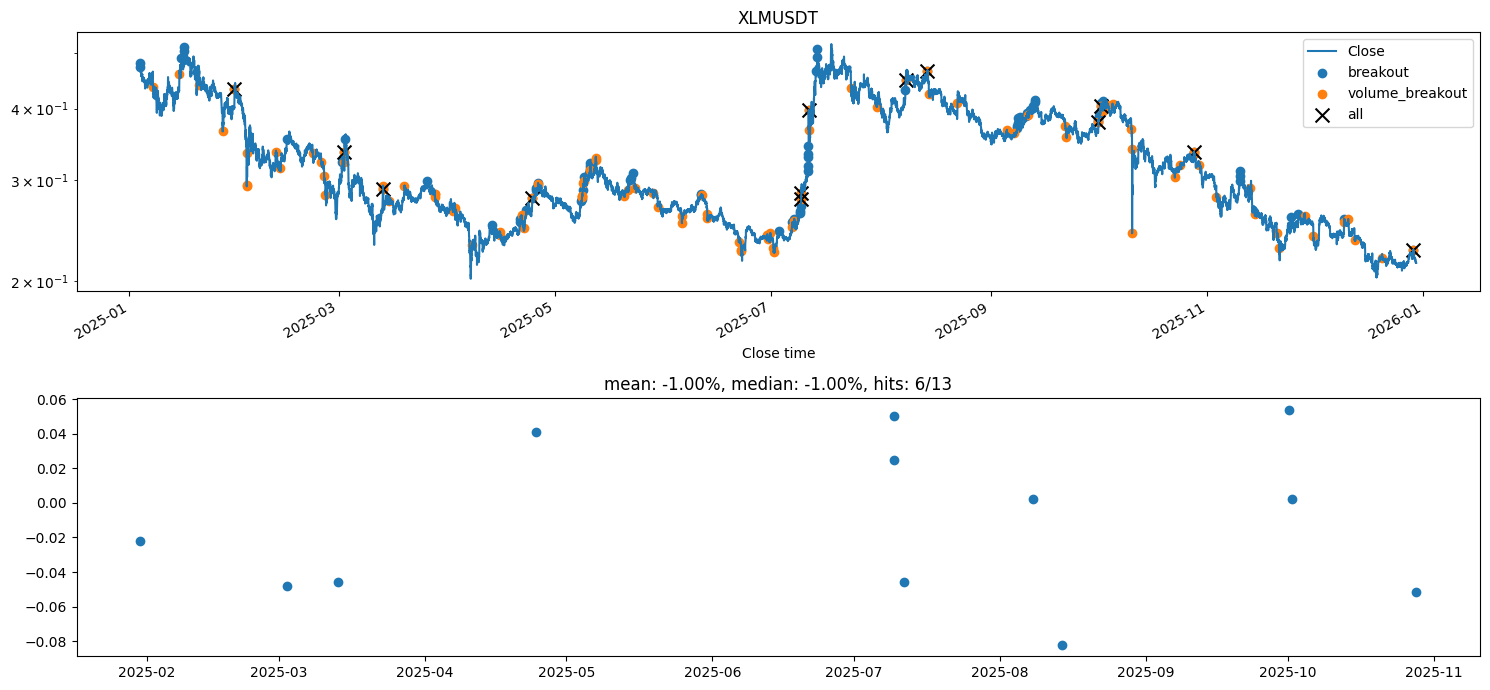

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


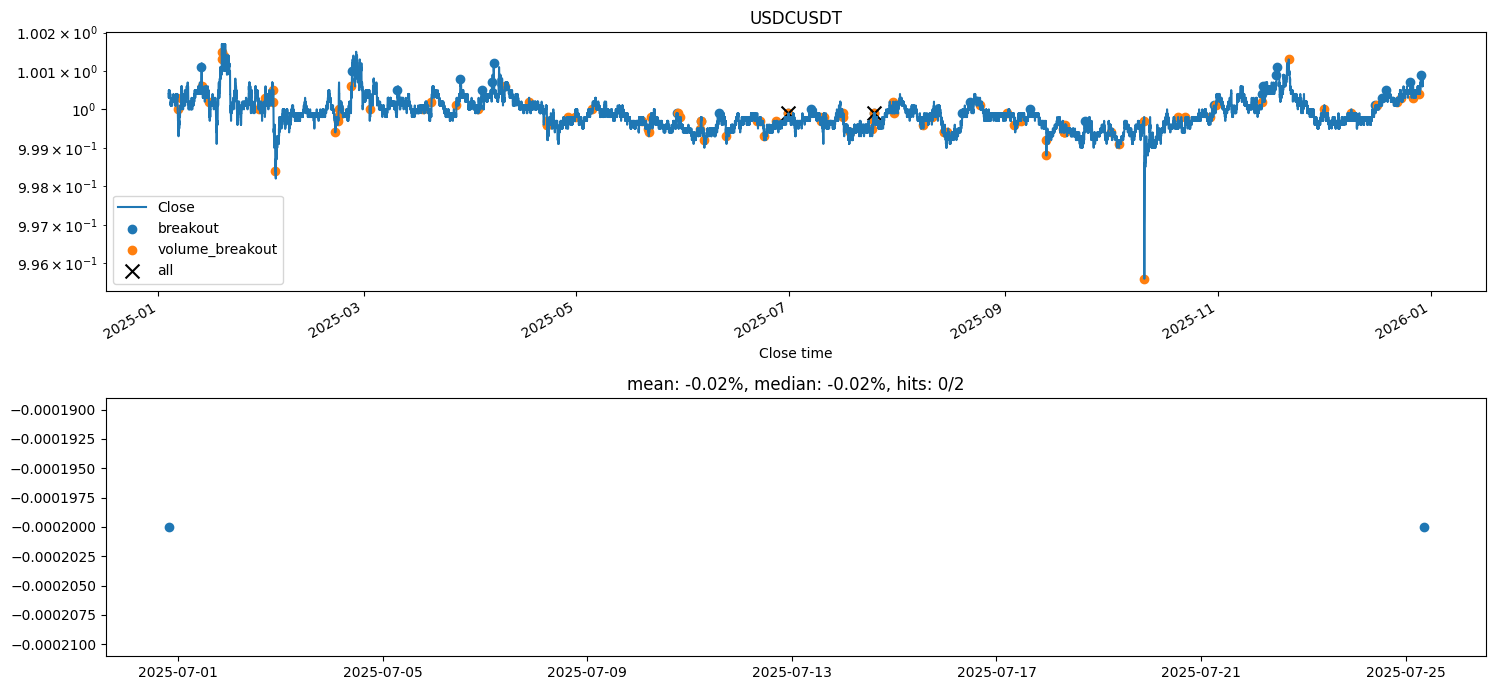

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


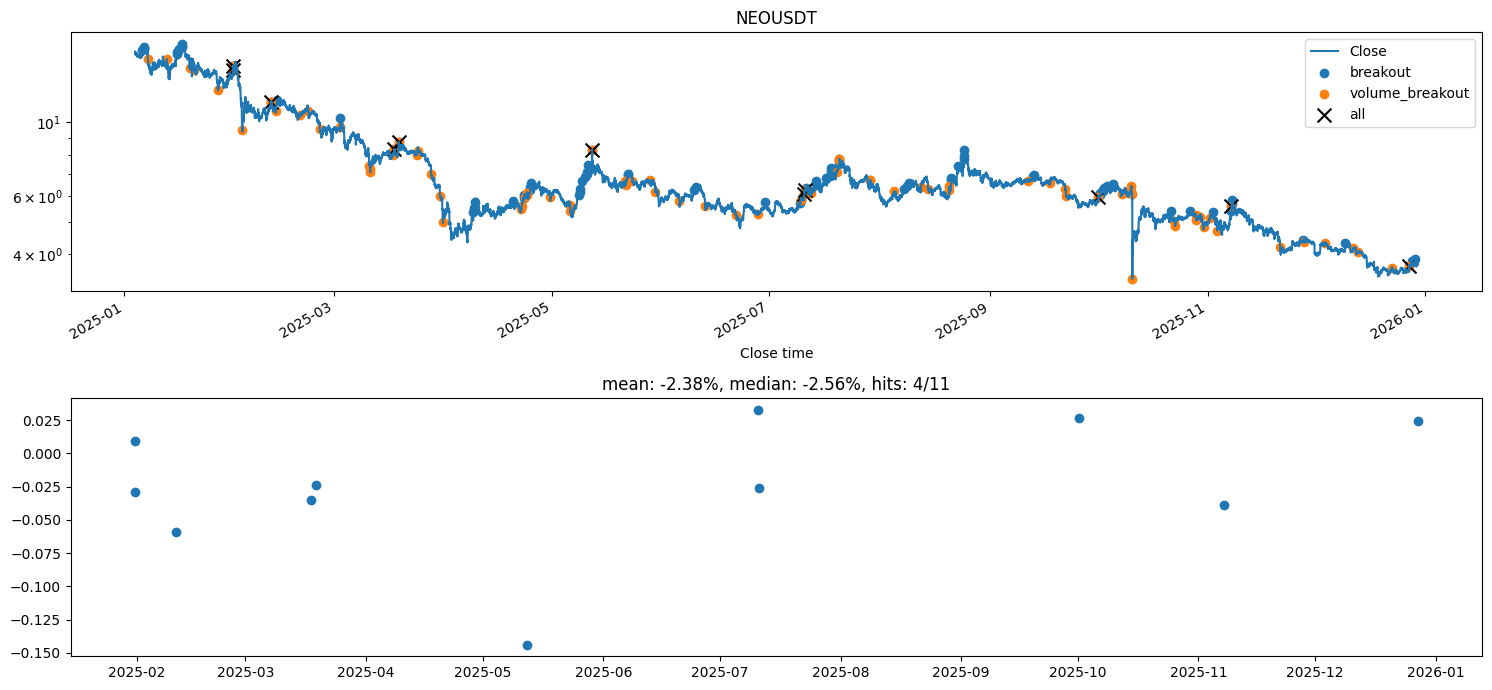

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


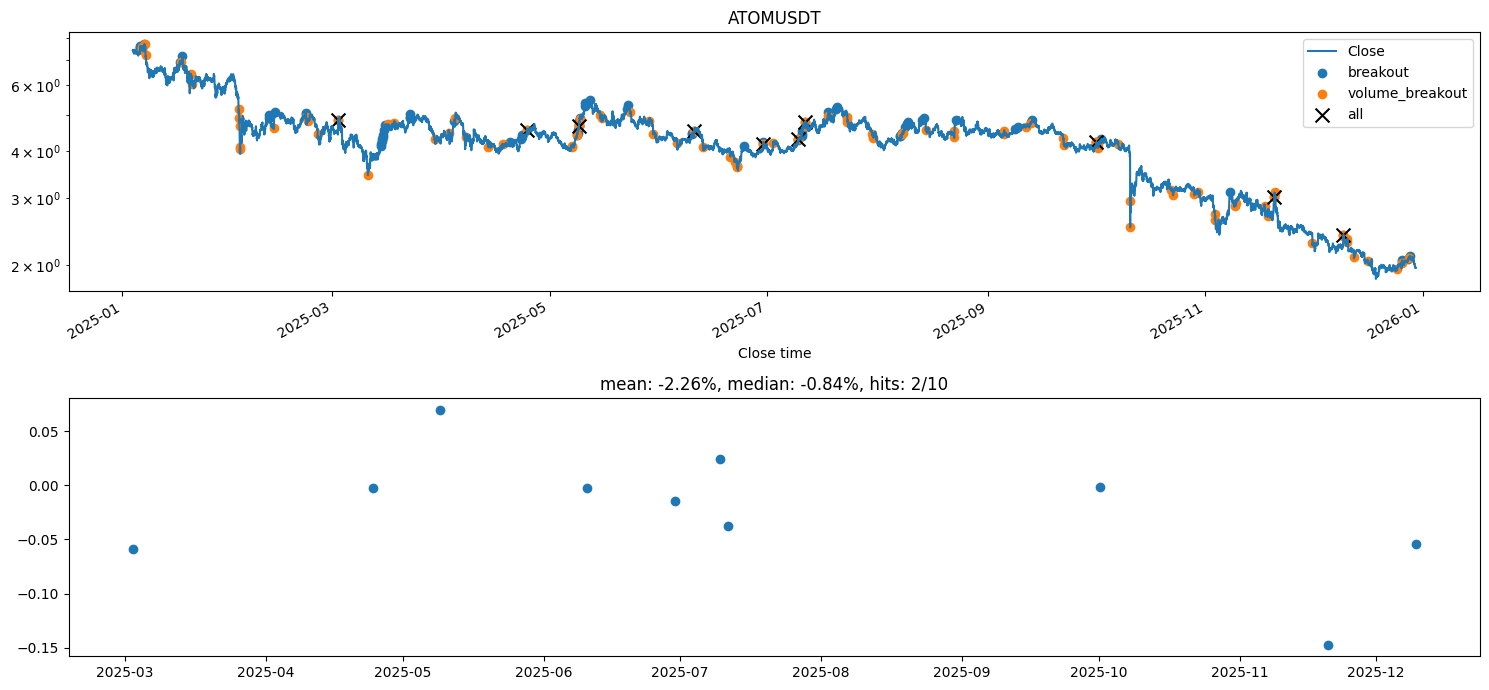

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


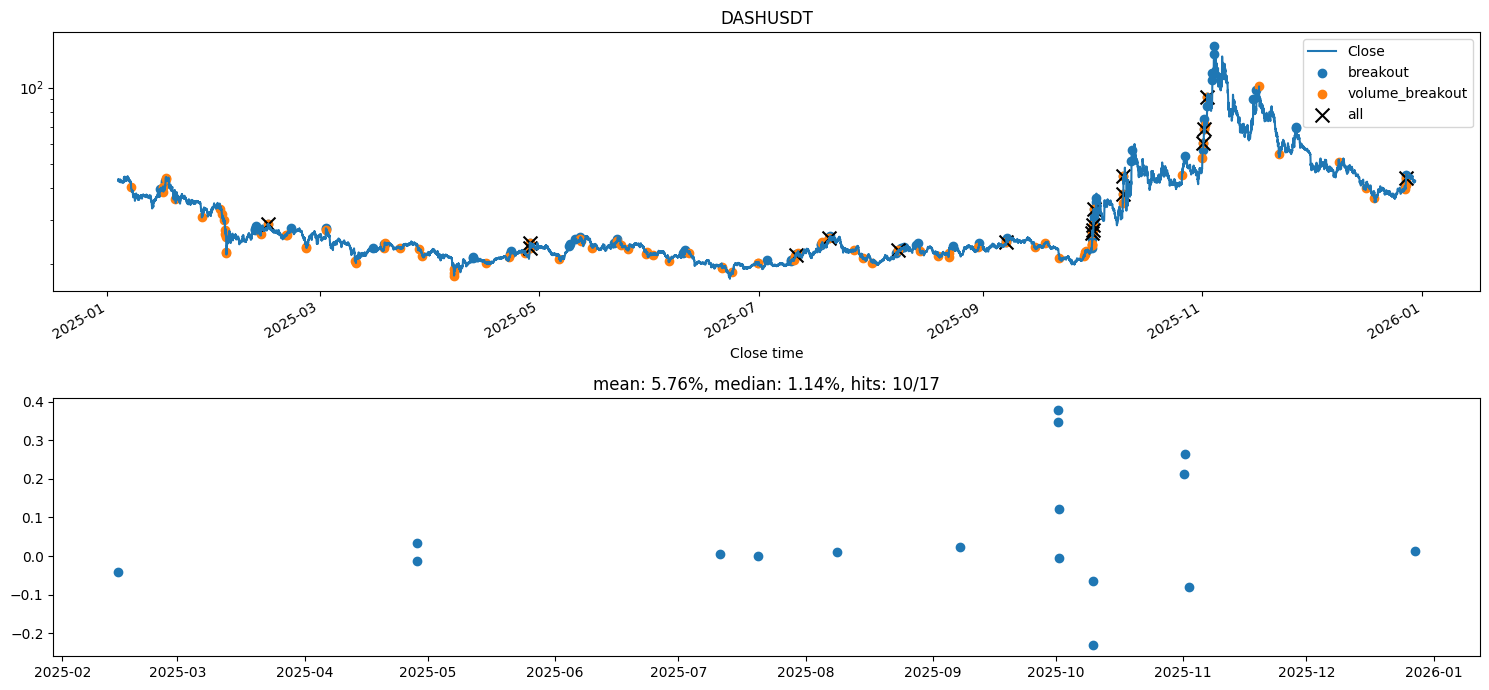

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


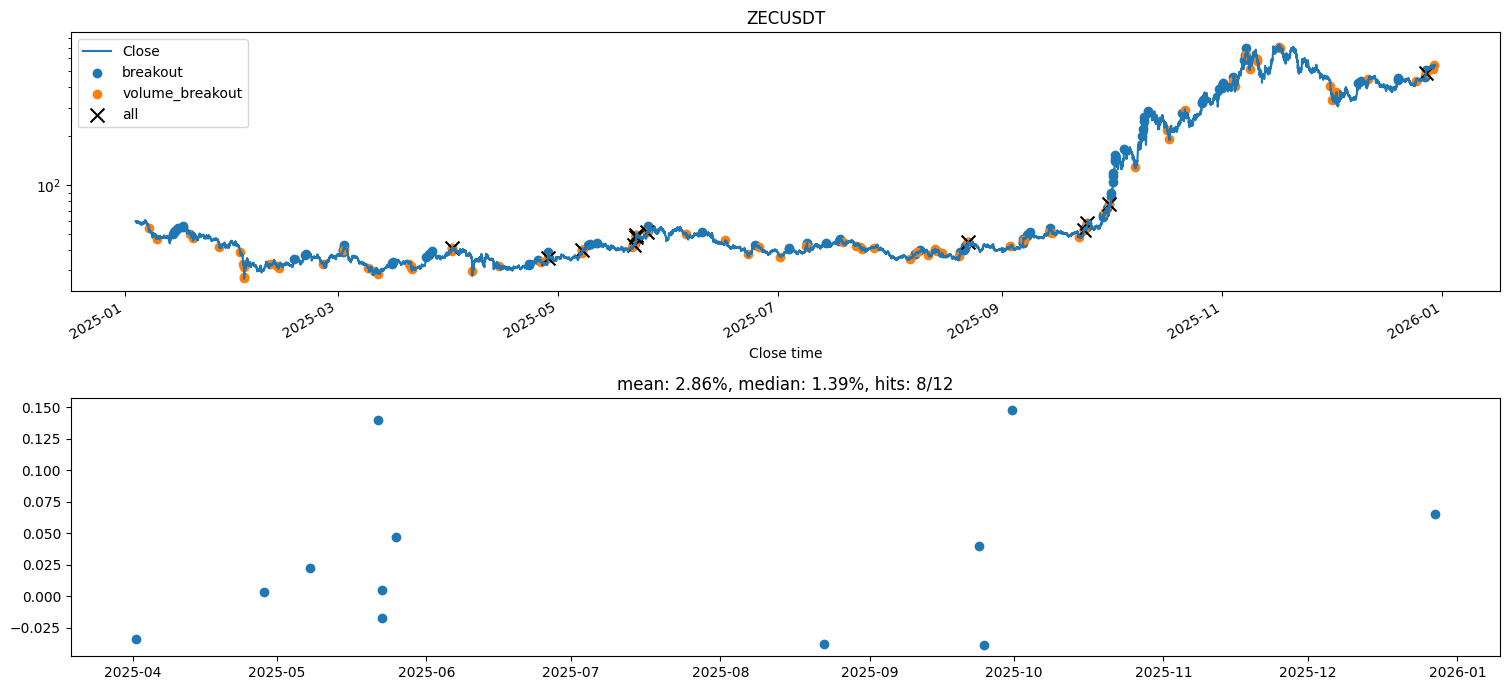

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


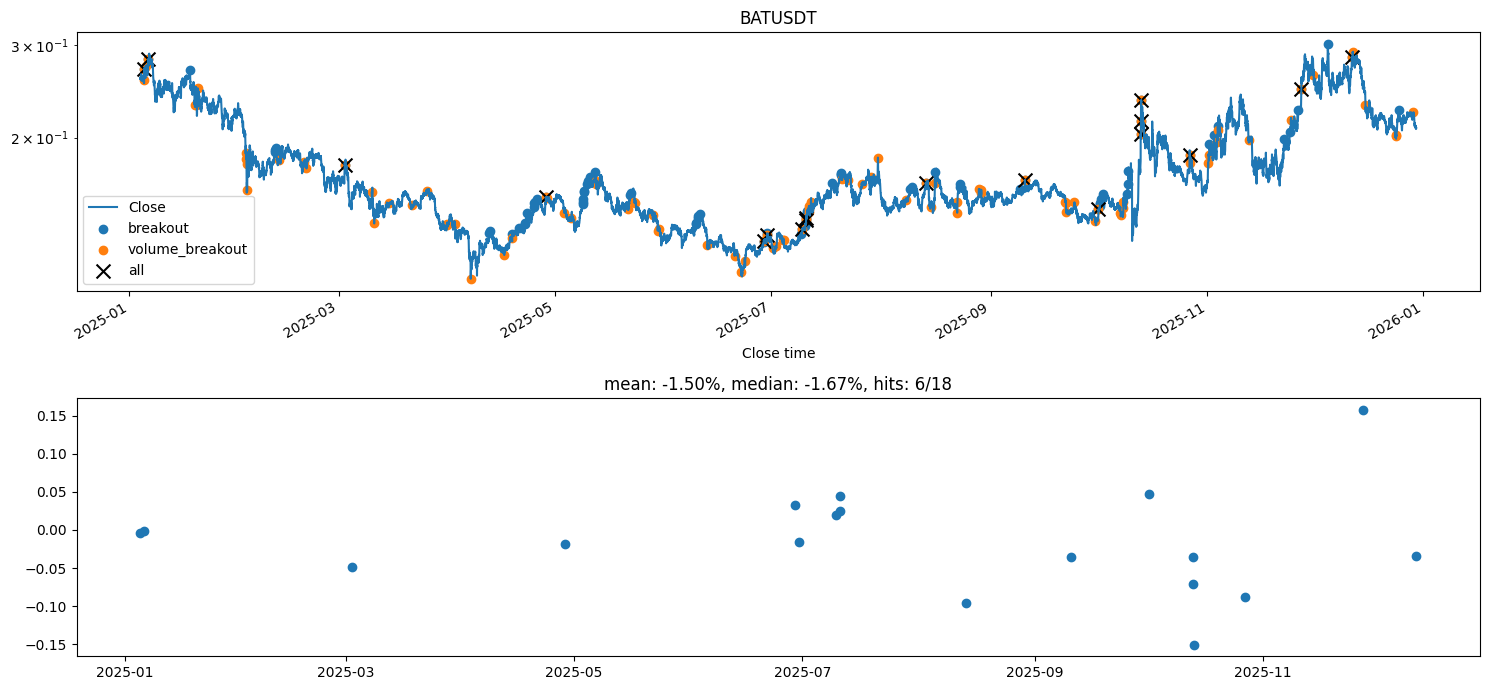

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


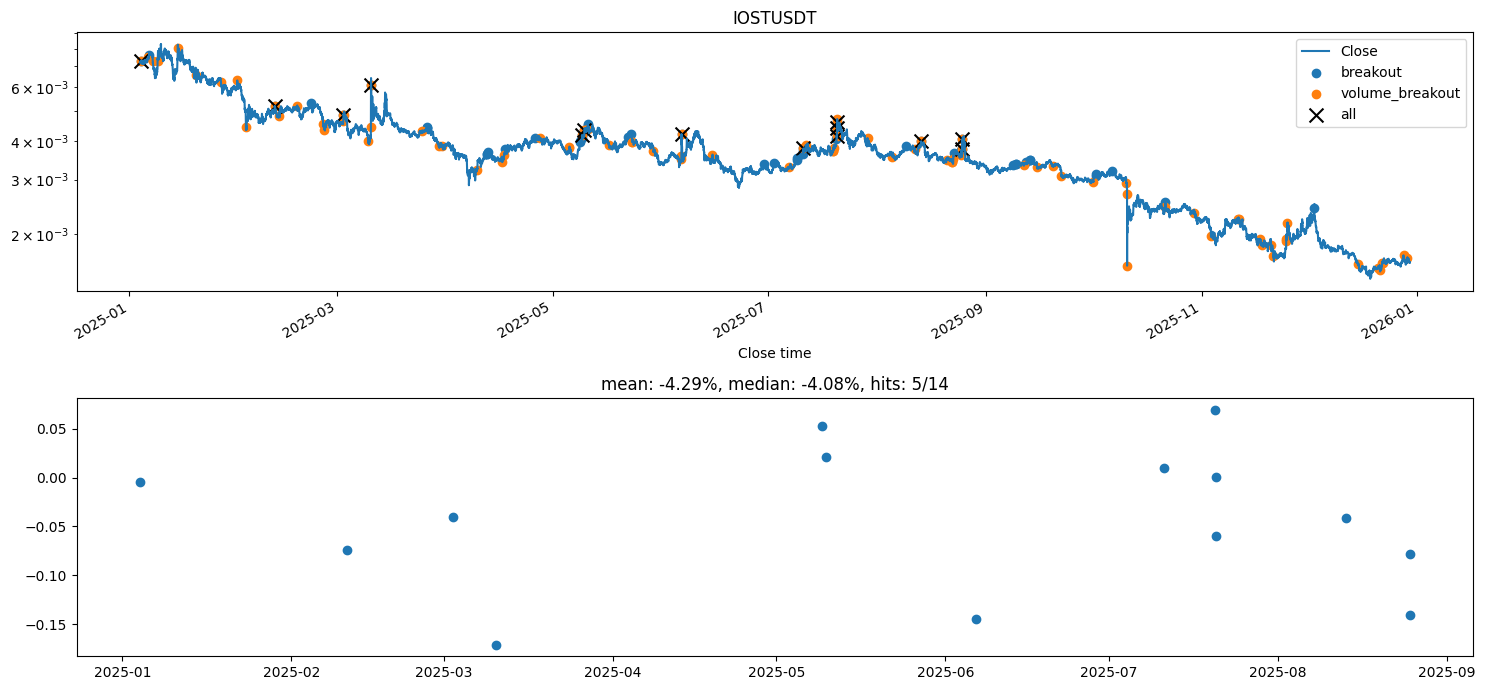

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


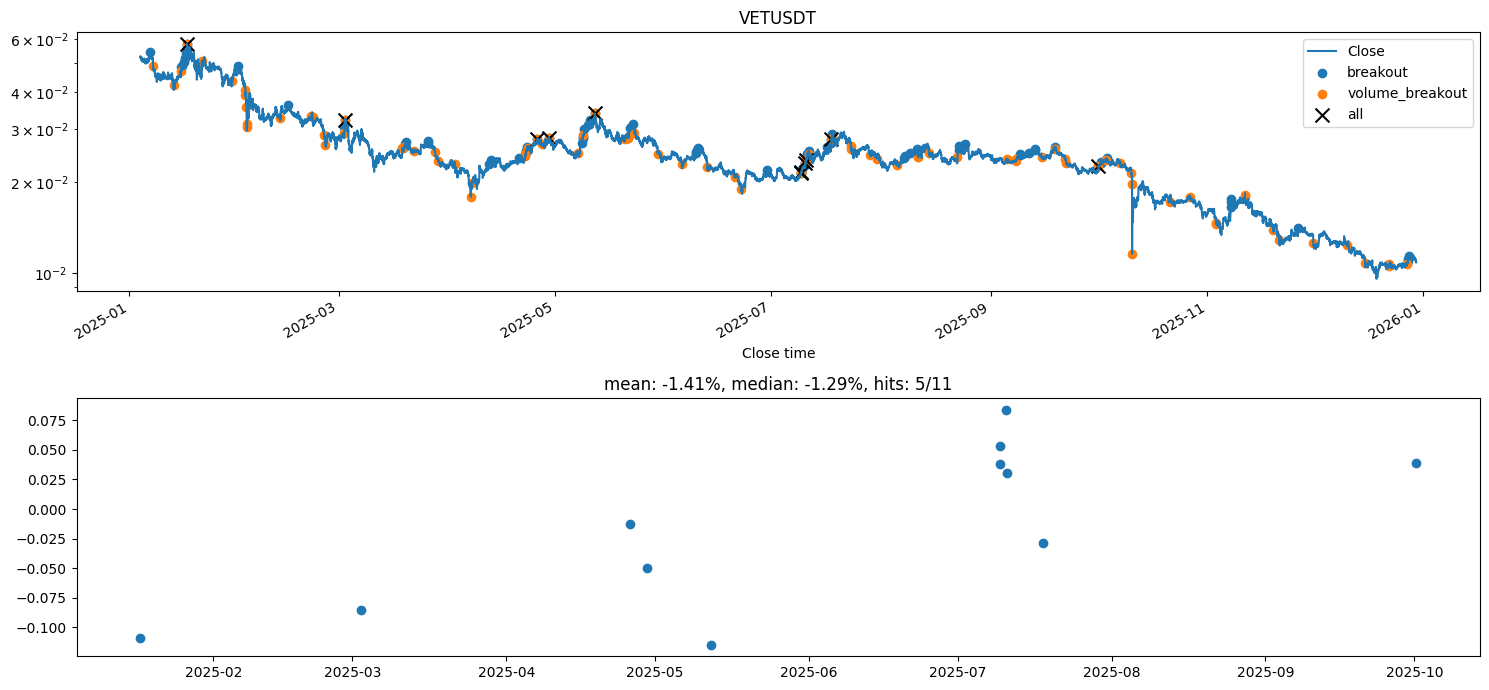

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


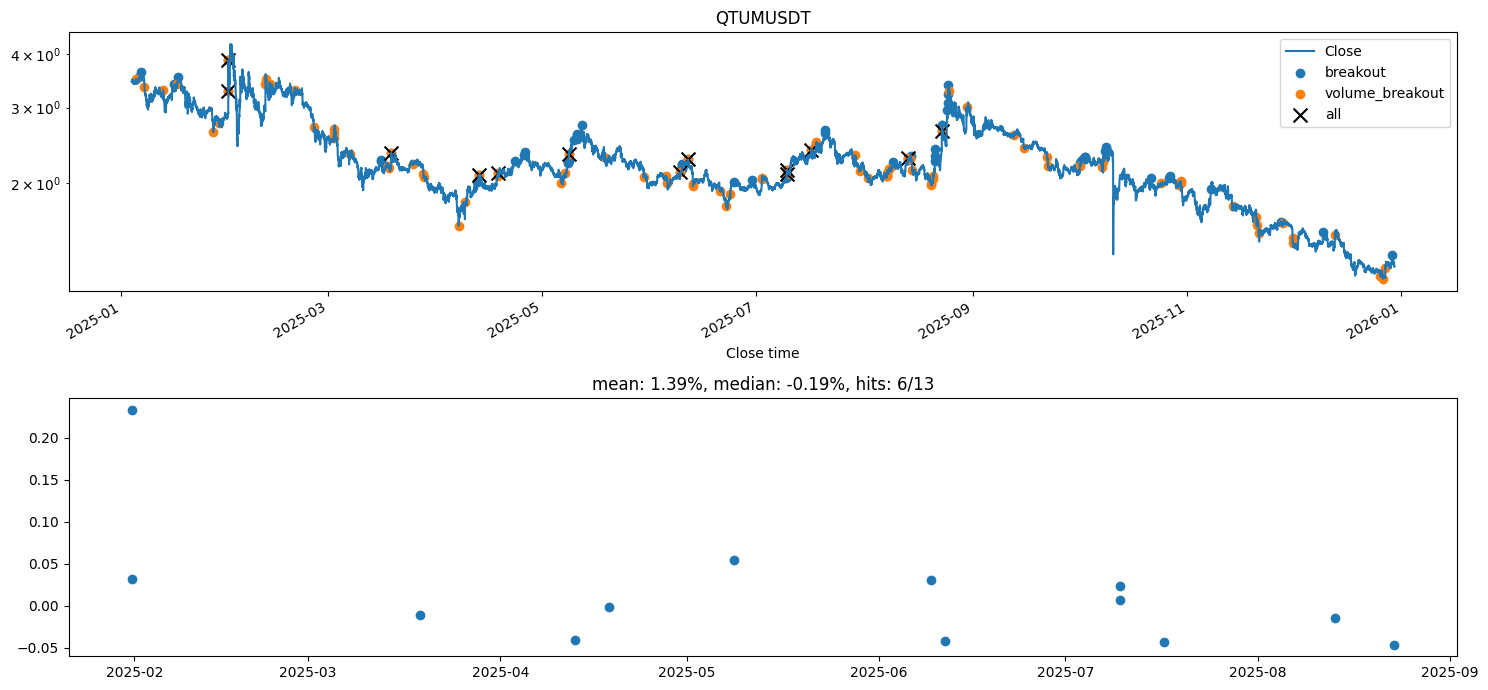

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


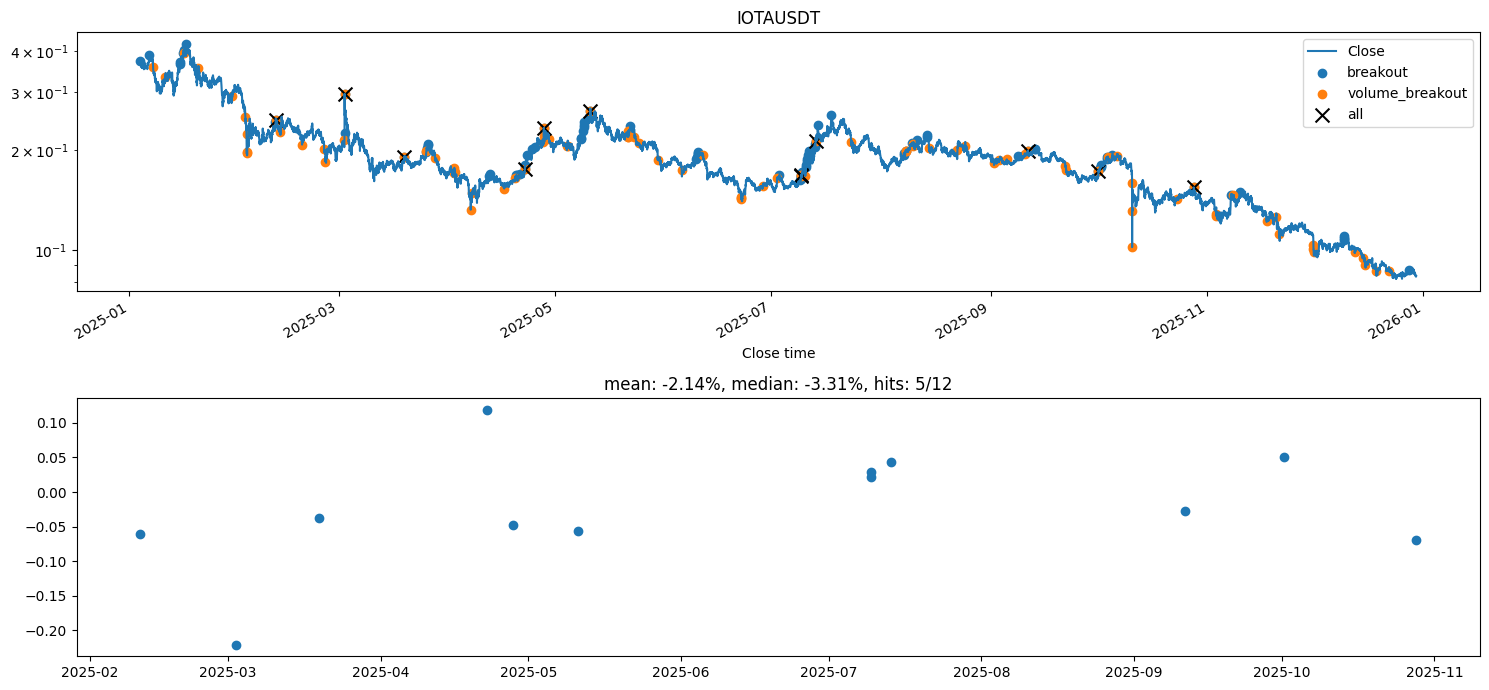

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


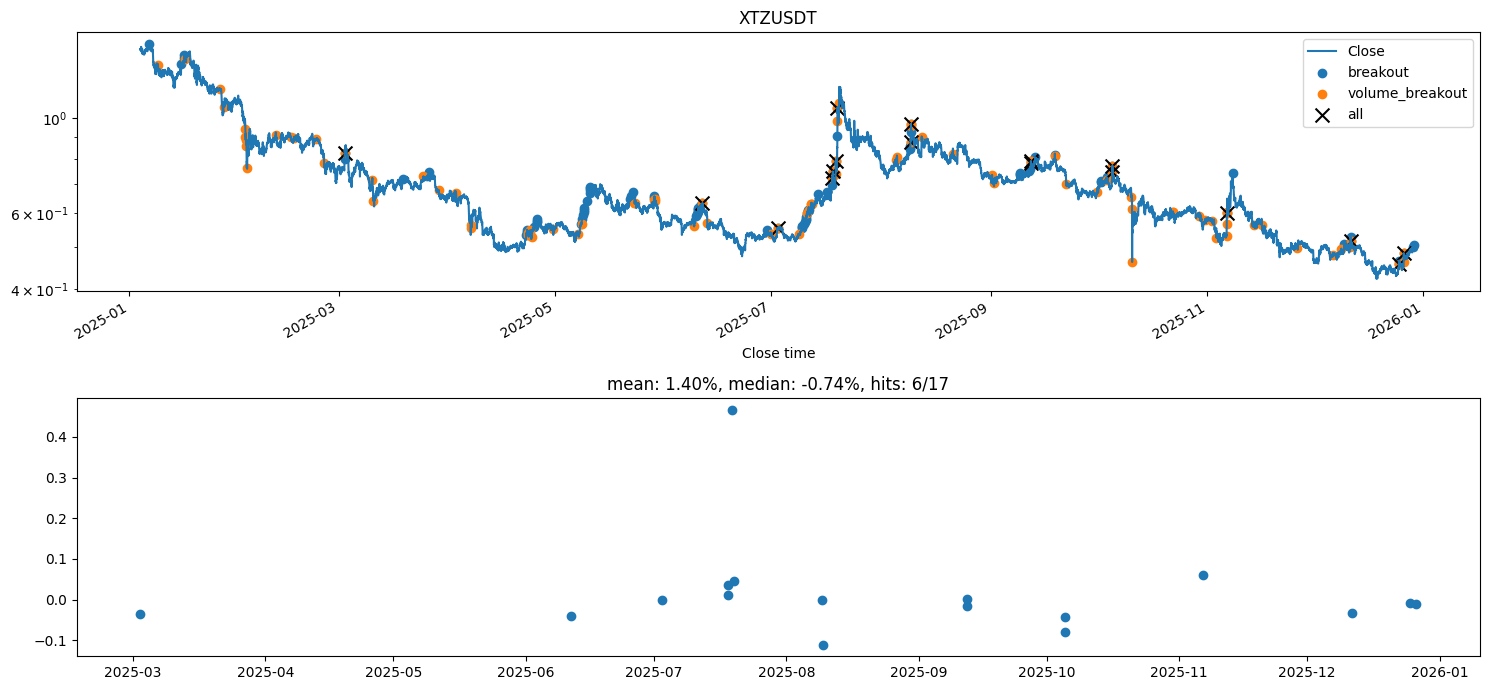

/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_47712/1300652519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)


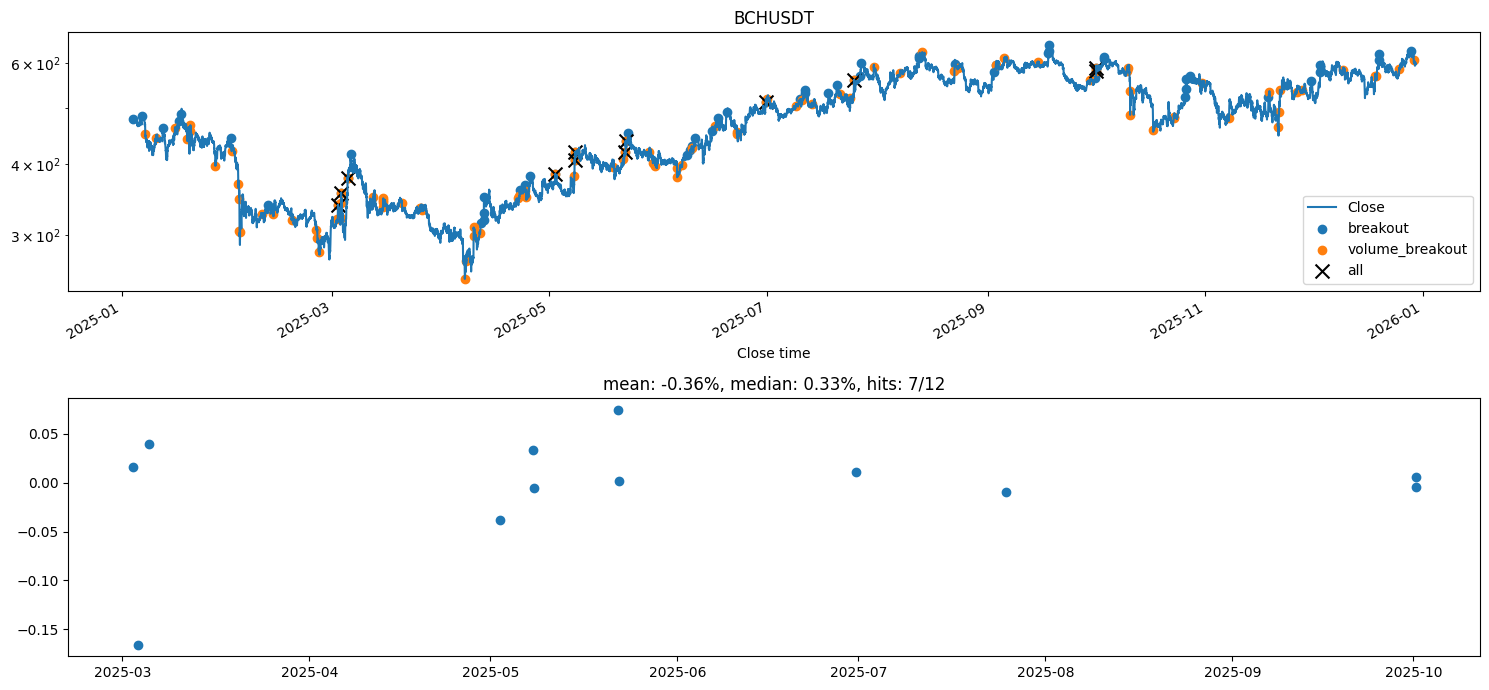

In [ ]:
import matplotlib.pyplot as plt
stats = {}

for ticker in datas_signal.keys():
    ...
    
    df = datas[ticker].dropna()
    df['fwd_ret'] = df['Close'].pct_change(48).shift(-48)

    fig, axs = plt.subplots(2, 1, figsize=(15,7))

    df['Close'].plot(title=ticker, ax=axs[0])

    for name in names:
        signal_dates = df.loc[df[name]].index
        axs[0].scatter(signal_dates, df.loc[signal_dates]['Close'], label=name)
    
    signal_dates = df.loc[df[names].all(axis=1)].index
    axs[0].scatter(signal_dates, df.loc[signal_dates]['Close'], label='all', color='black', marker='x', s=100)
    axs[0].set_yscale('log')
    axs[0].legend()

    signal_dates_returns = df.loc[df[names].all(axis=1), 'fwd_ret']
    axs[1].scatter(signal_dates_returns.index, signal_dates_returns)
    mean = signal_dates_returns.mean()
    median = signal_dates_returns.median()
    hit_rate = len(signal_dates_returns[signal_dates_returns>0]) / len(signal_dates_returns) if len(signal_dates_returns) > 0 else 0
    stats[ticker] = {
        'mean_return': mean,
        'median_return': median,
        'hit_rate': hit_rate,
        'num_signals': len(signal_dates_returns)
    }
    axs[1].set_title(f'mean: {mean*100:.2f}%, median: {median*100:.2f}%, hits: {len(signal_dates_returns[signal_dates_returns>0])}/{len(signal_dates_returns)}')
    fig.tight_layout()
    plt.show()

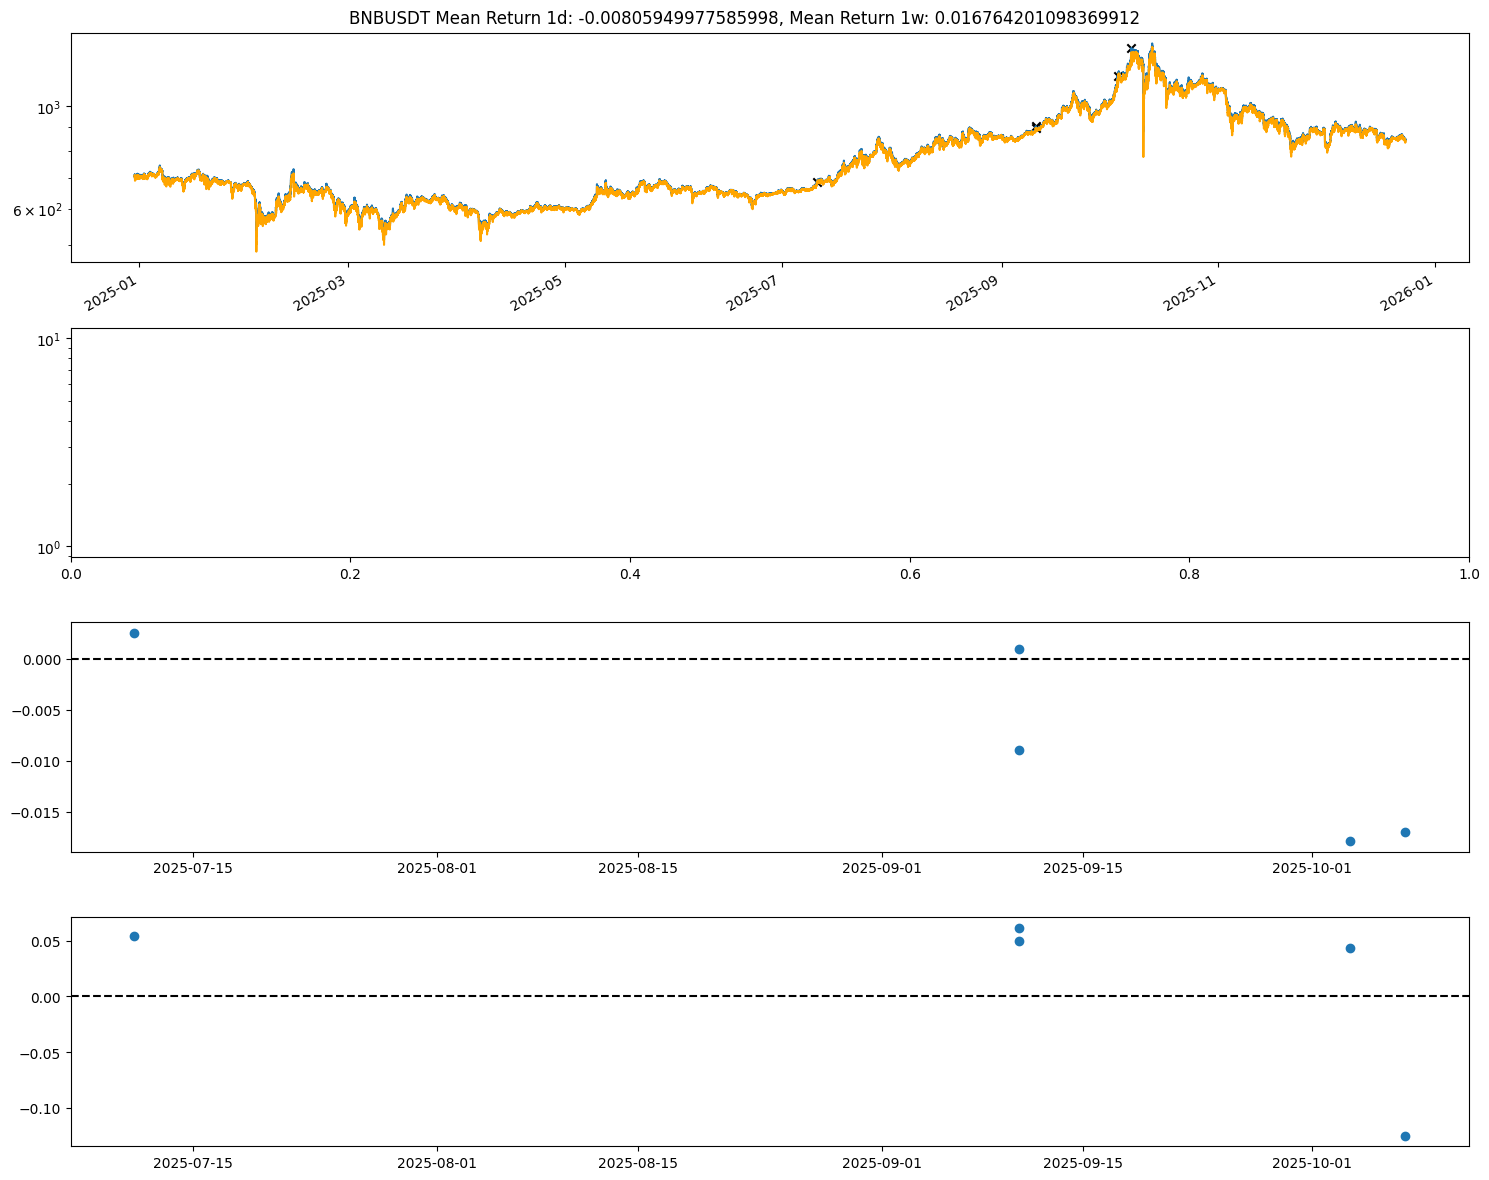

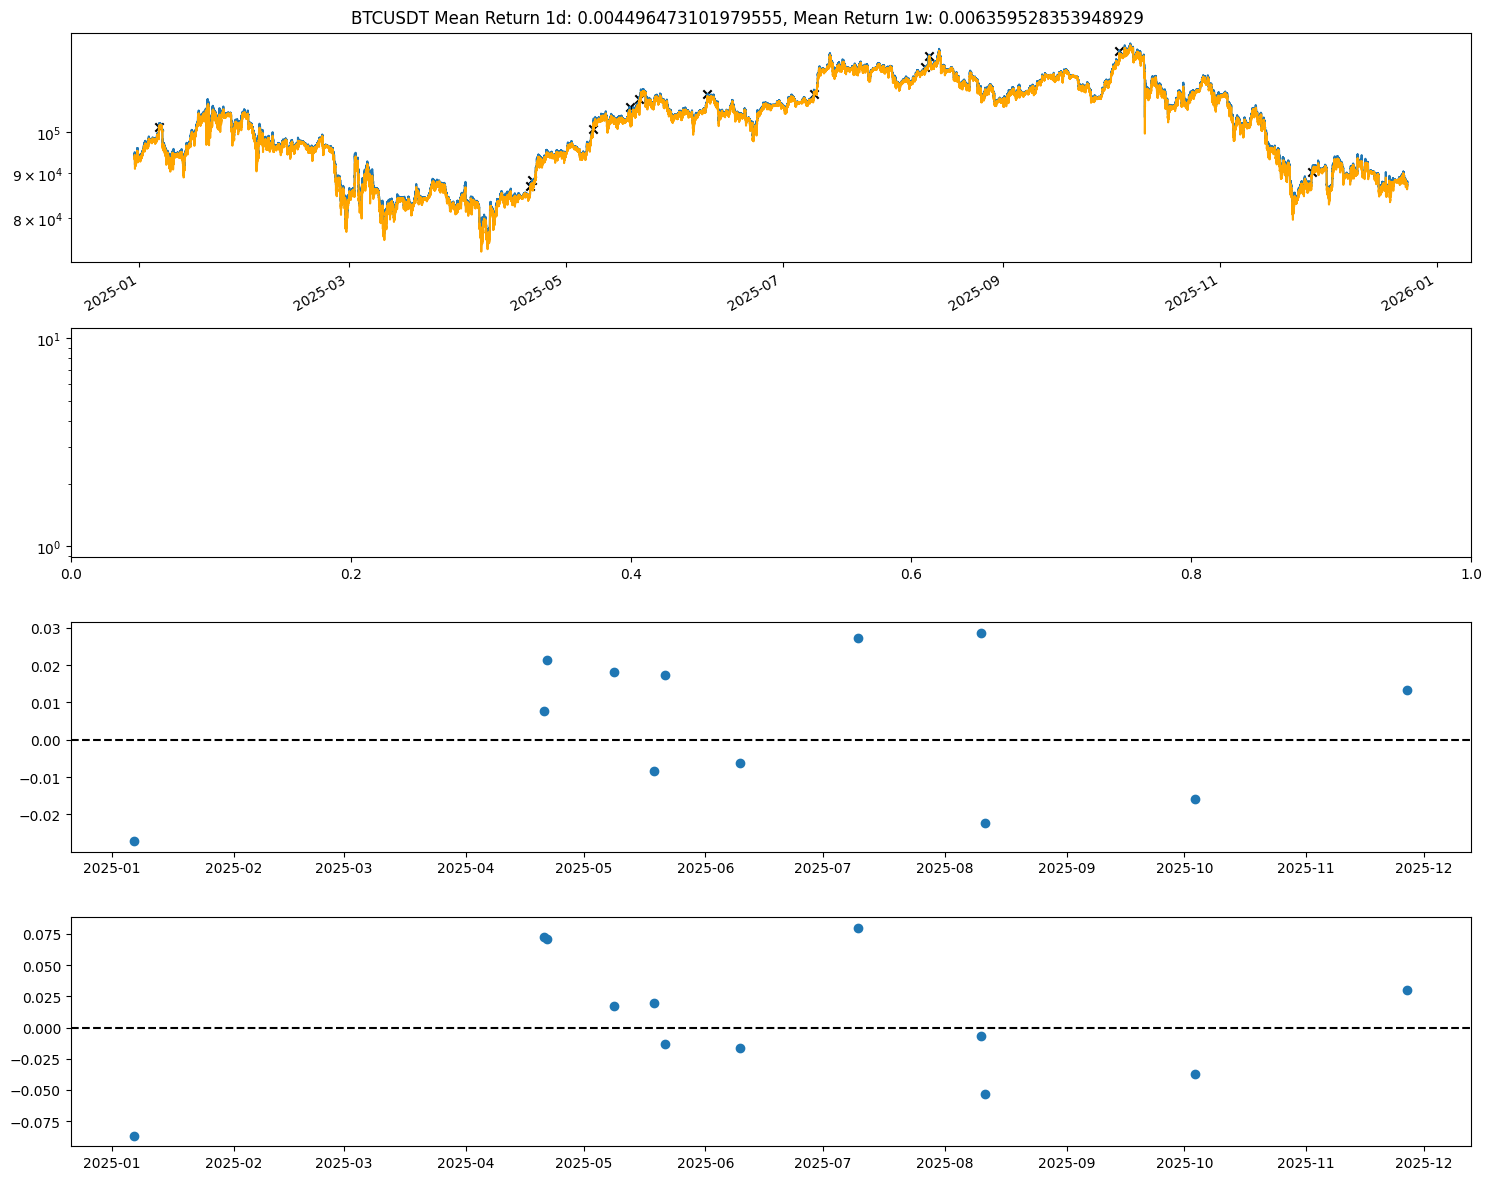

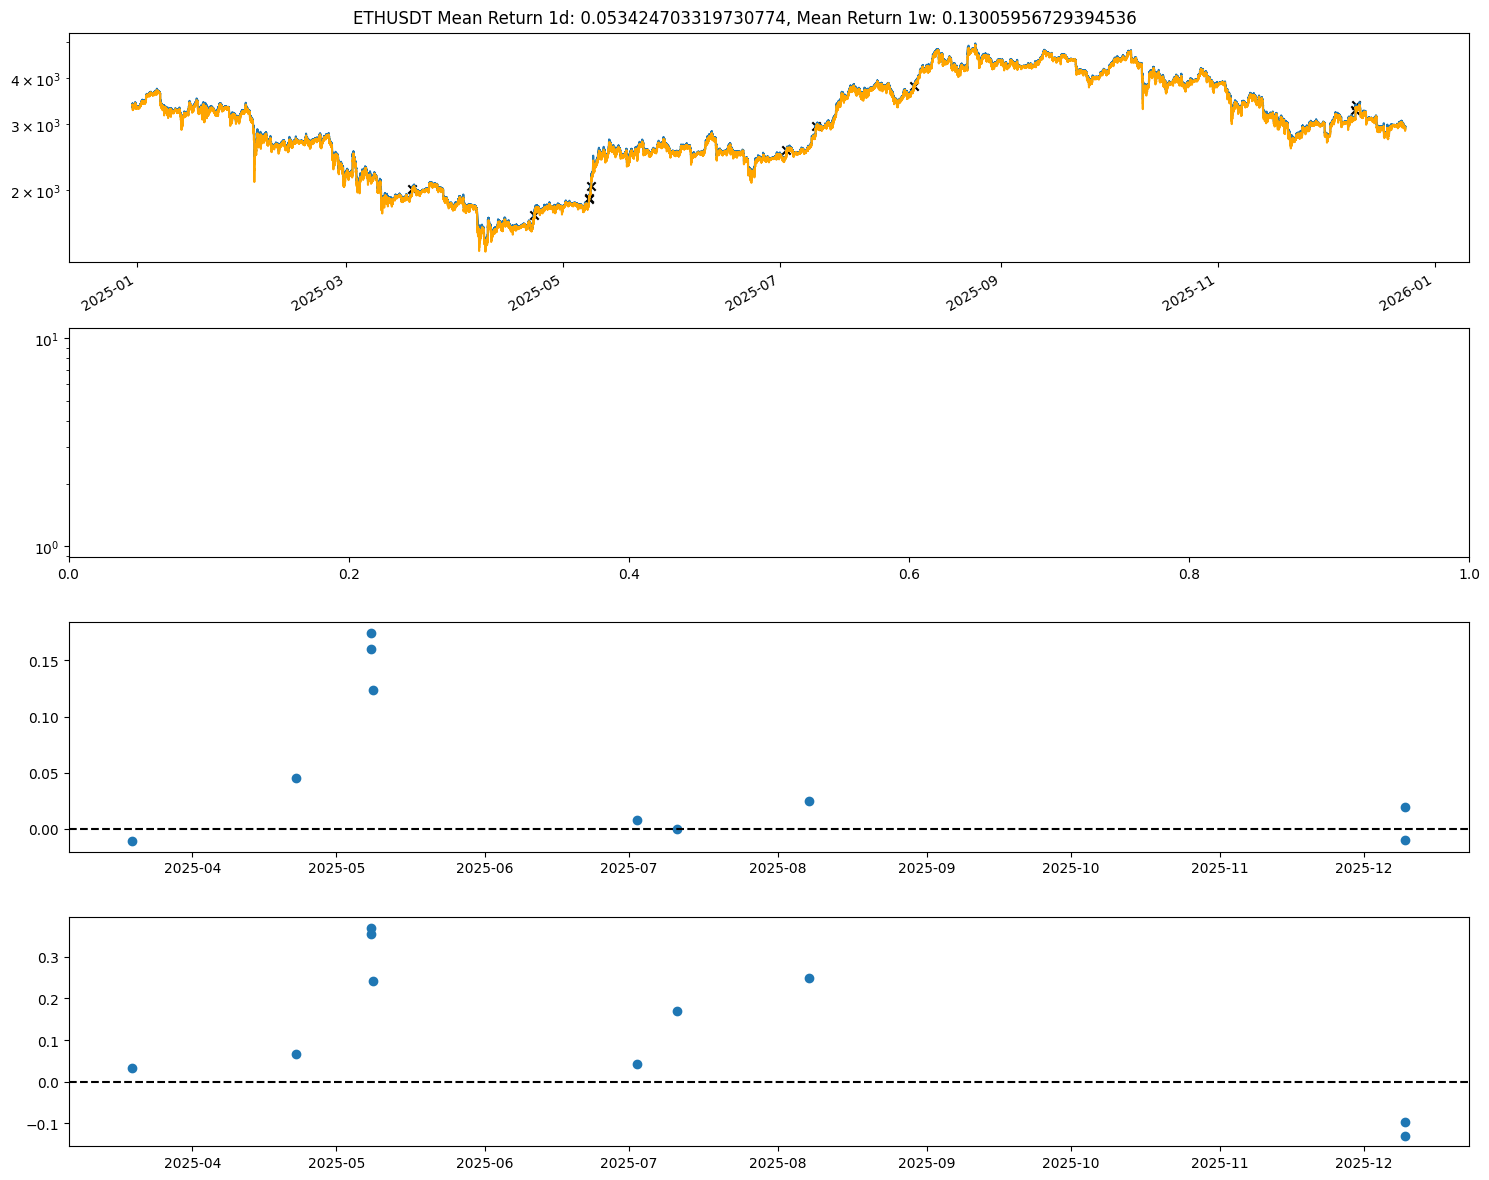

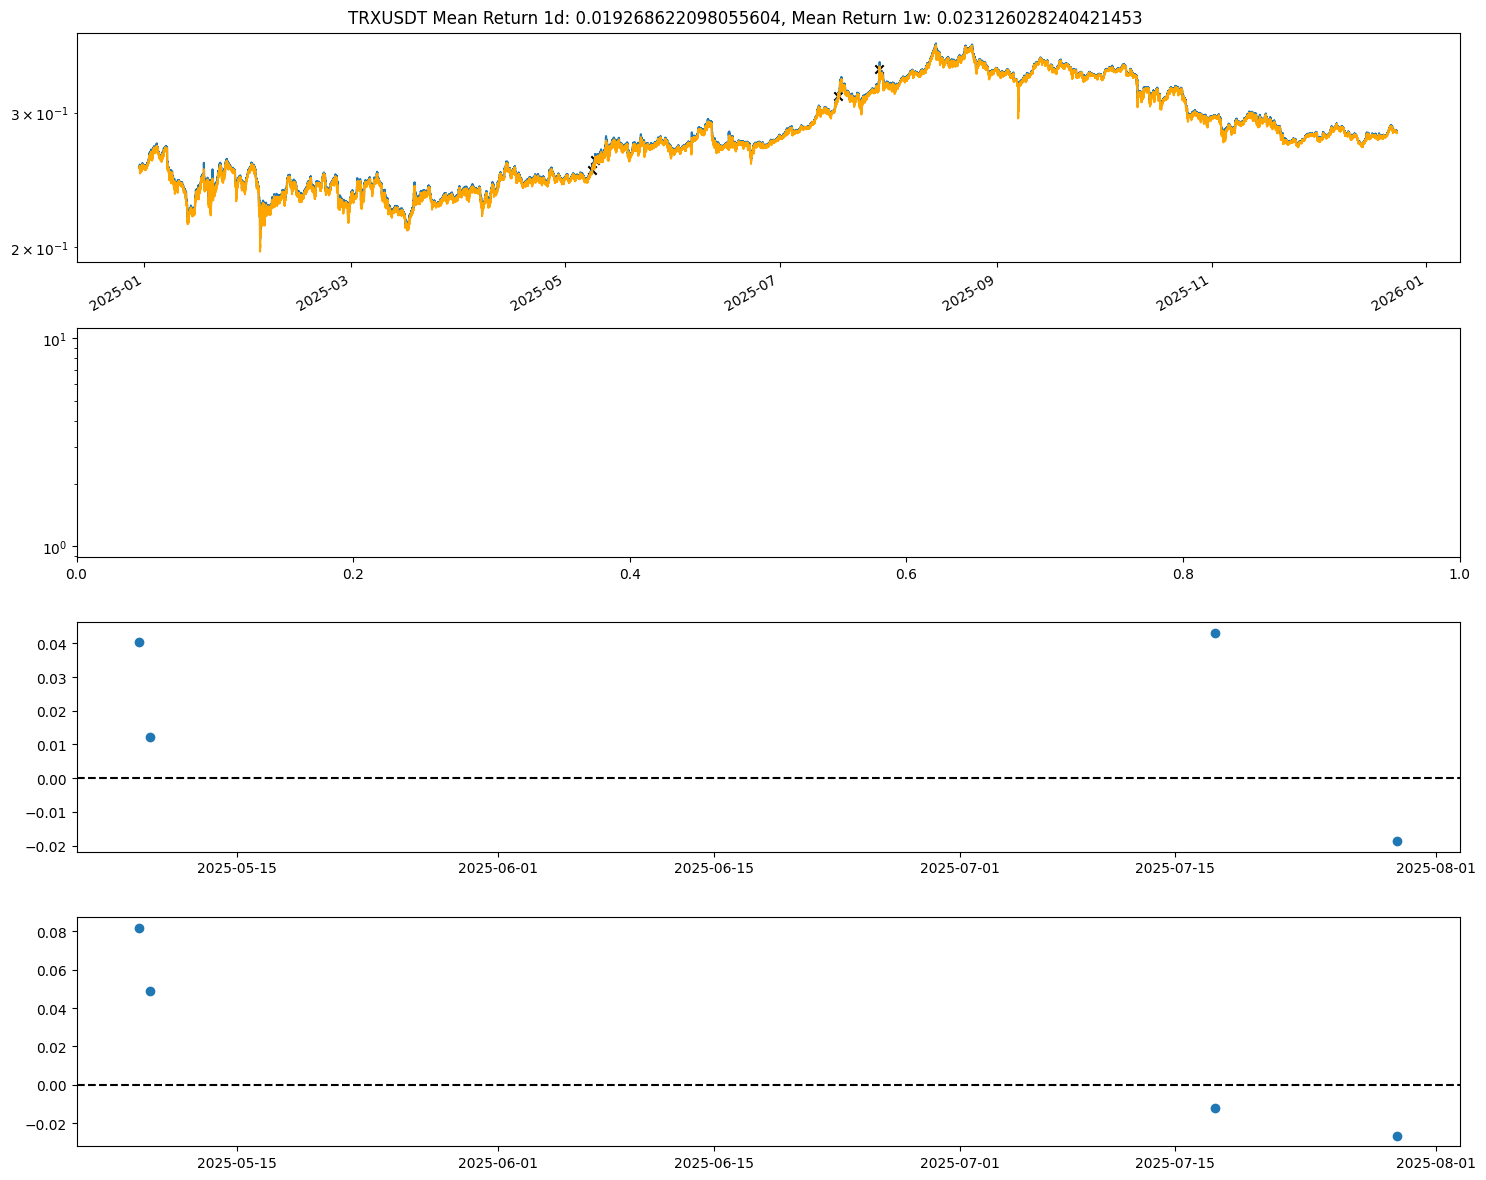

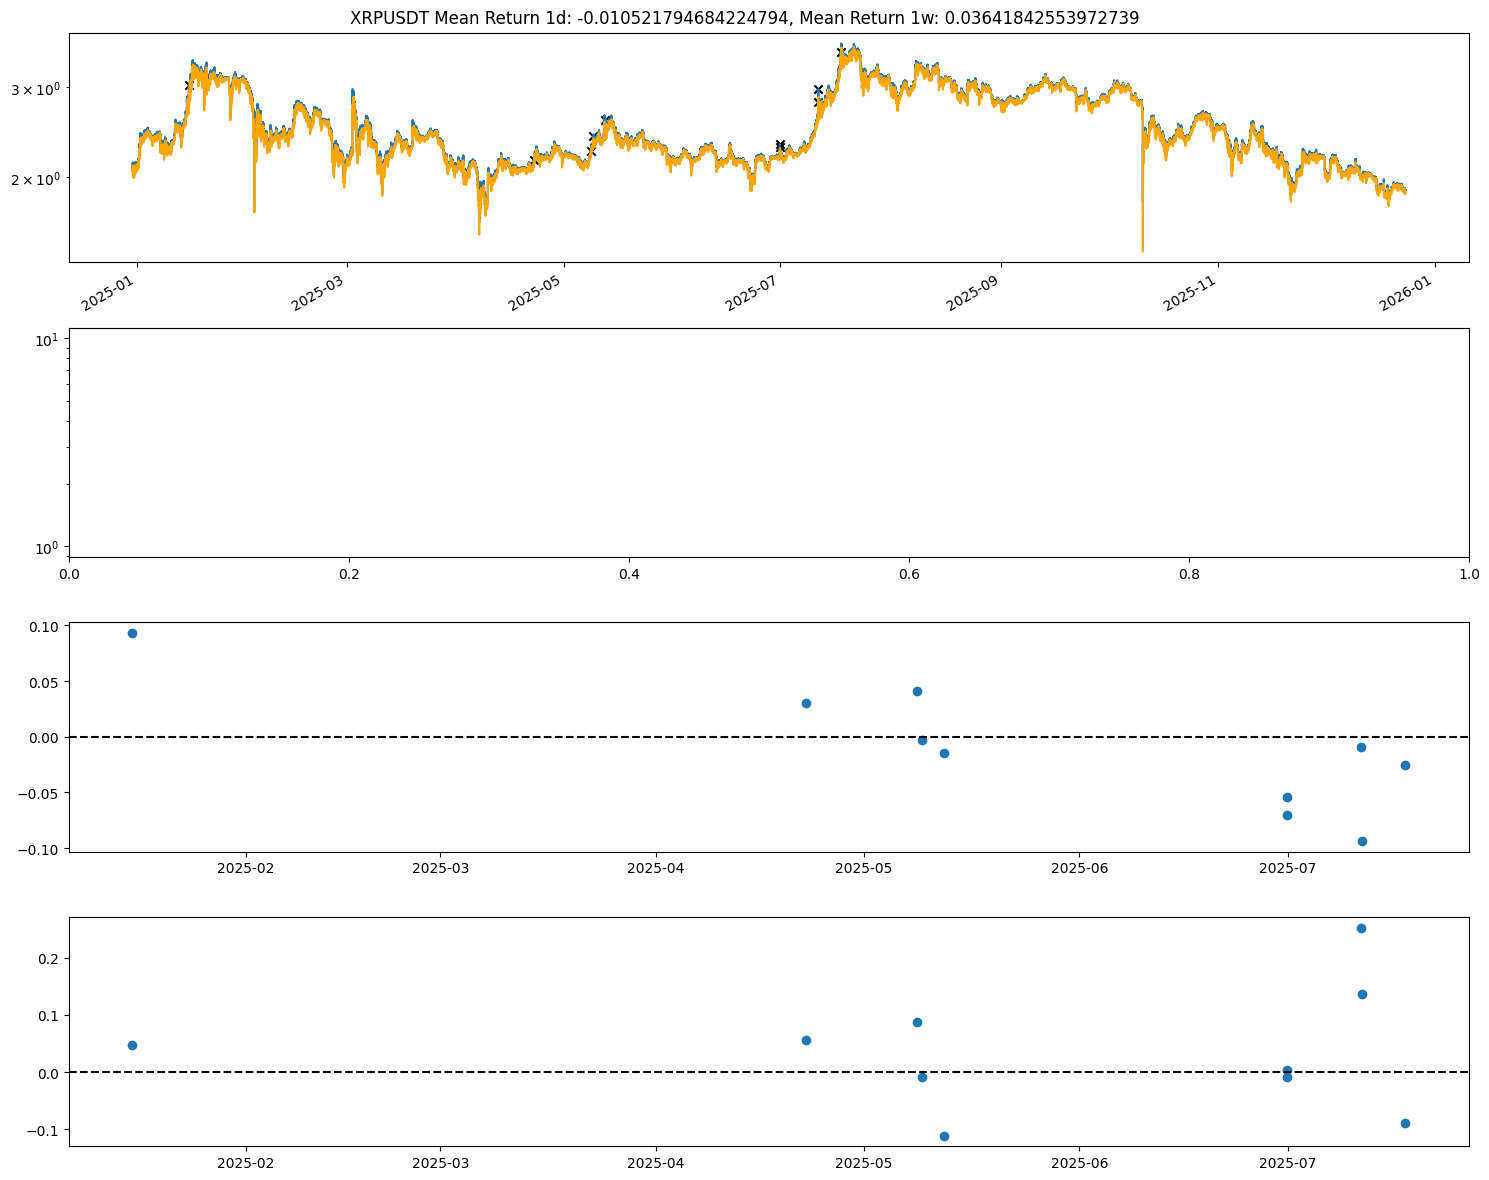

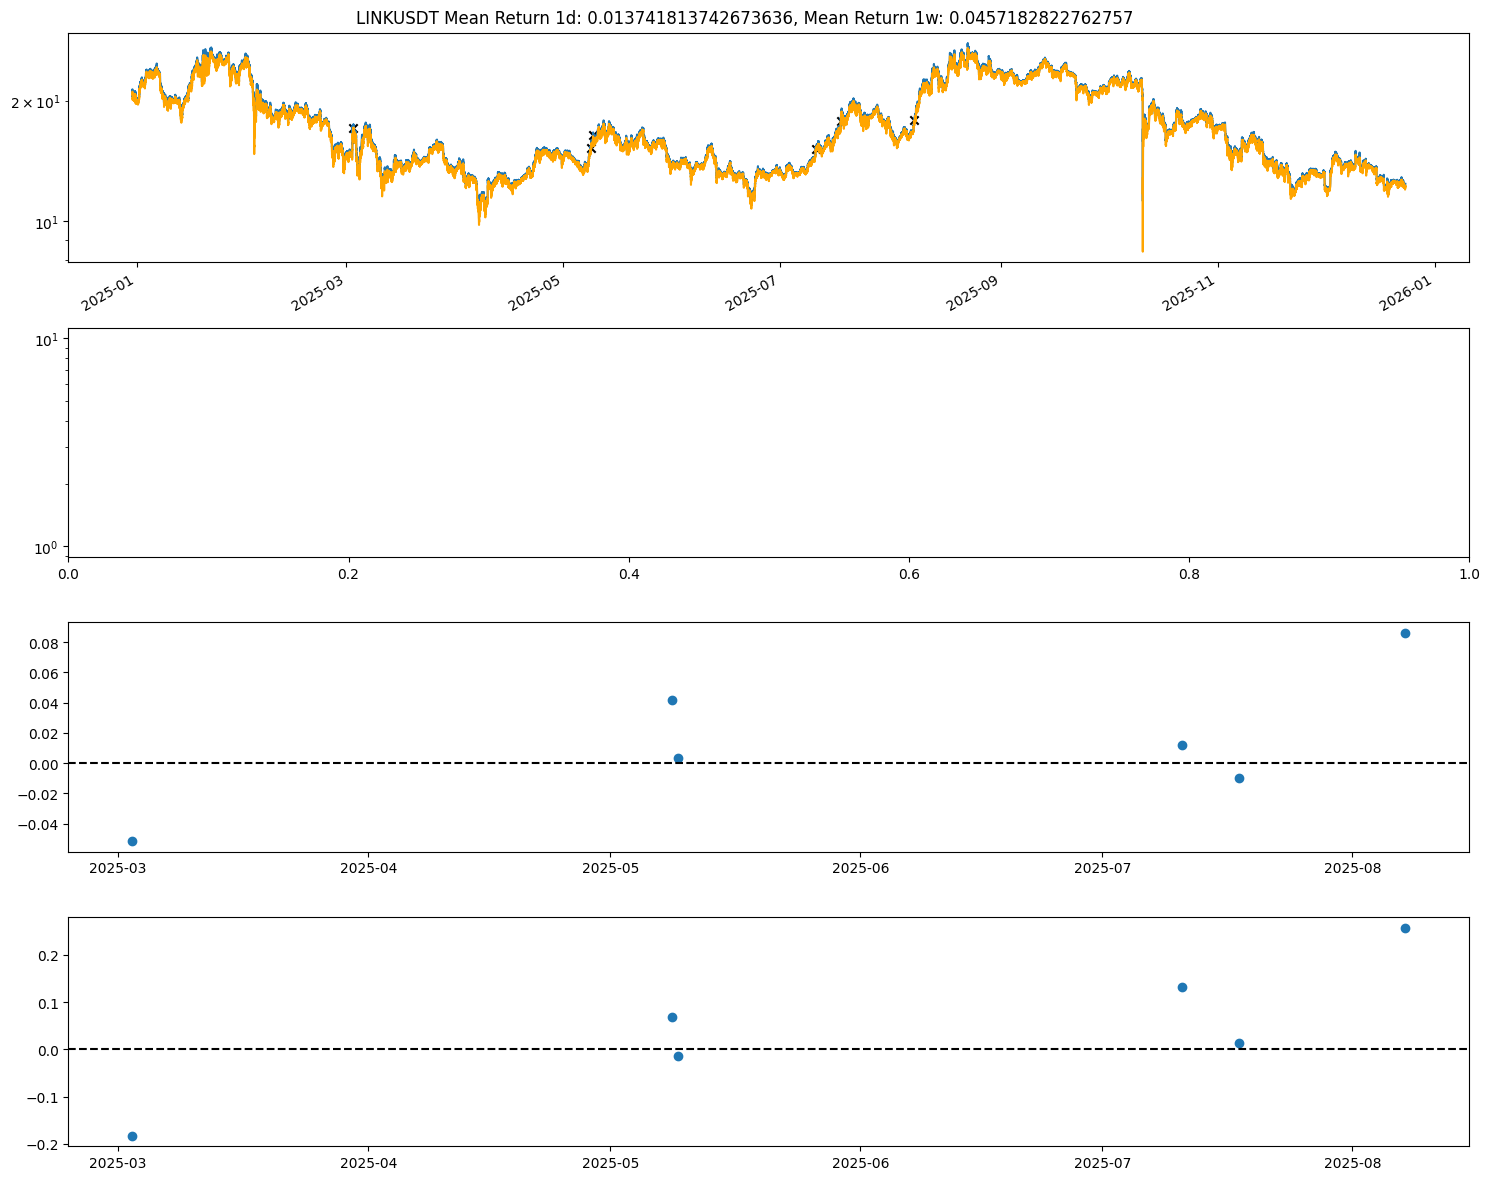

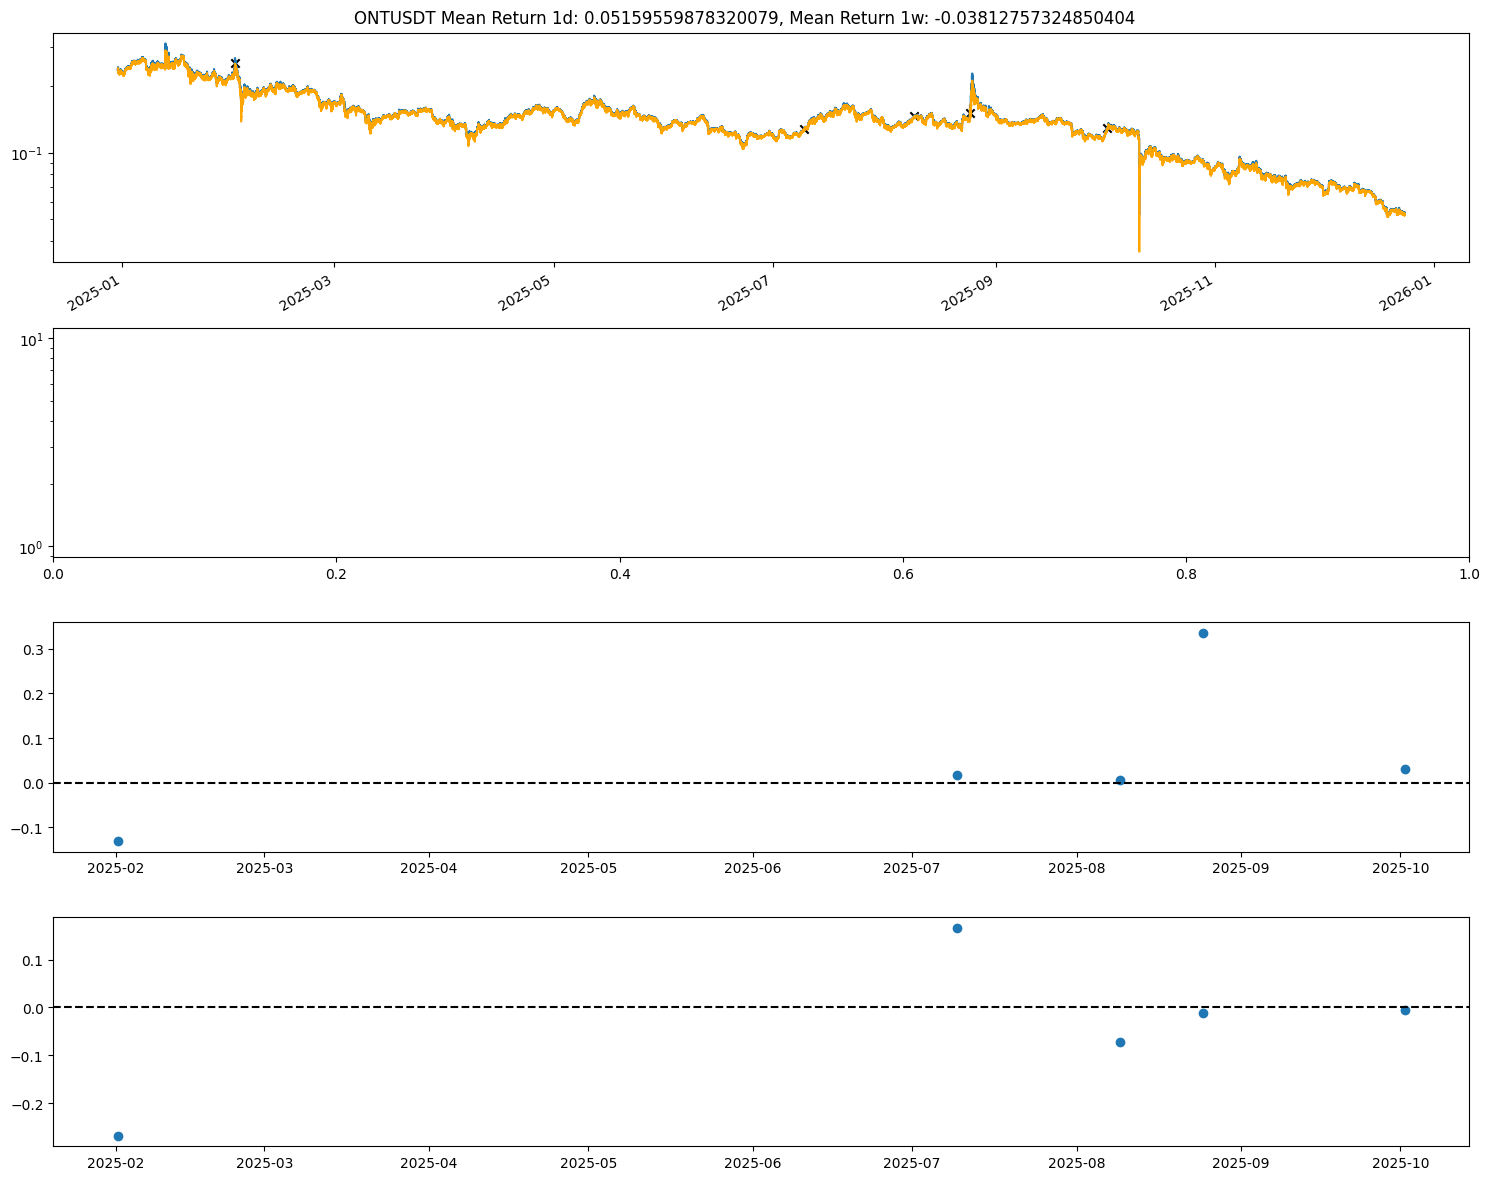

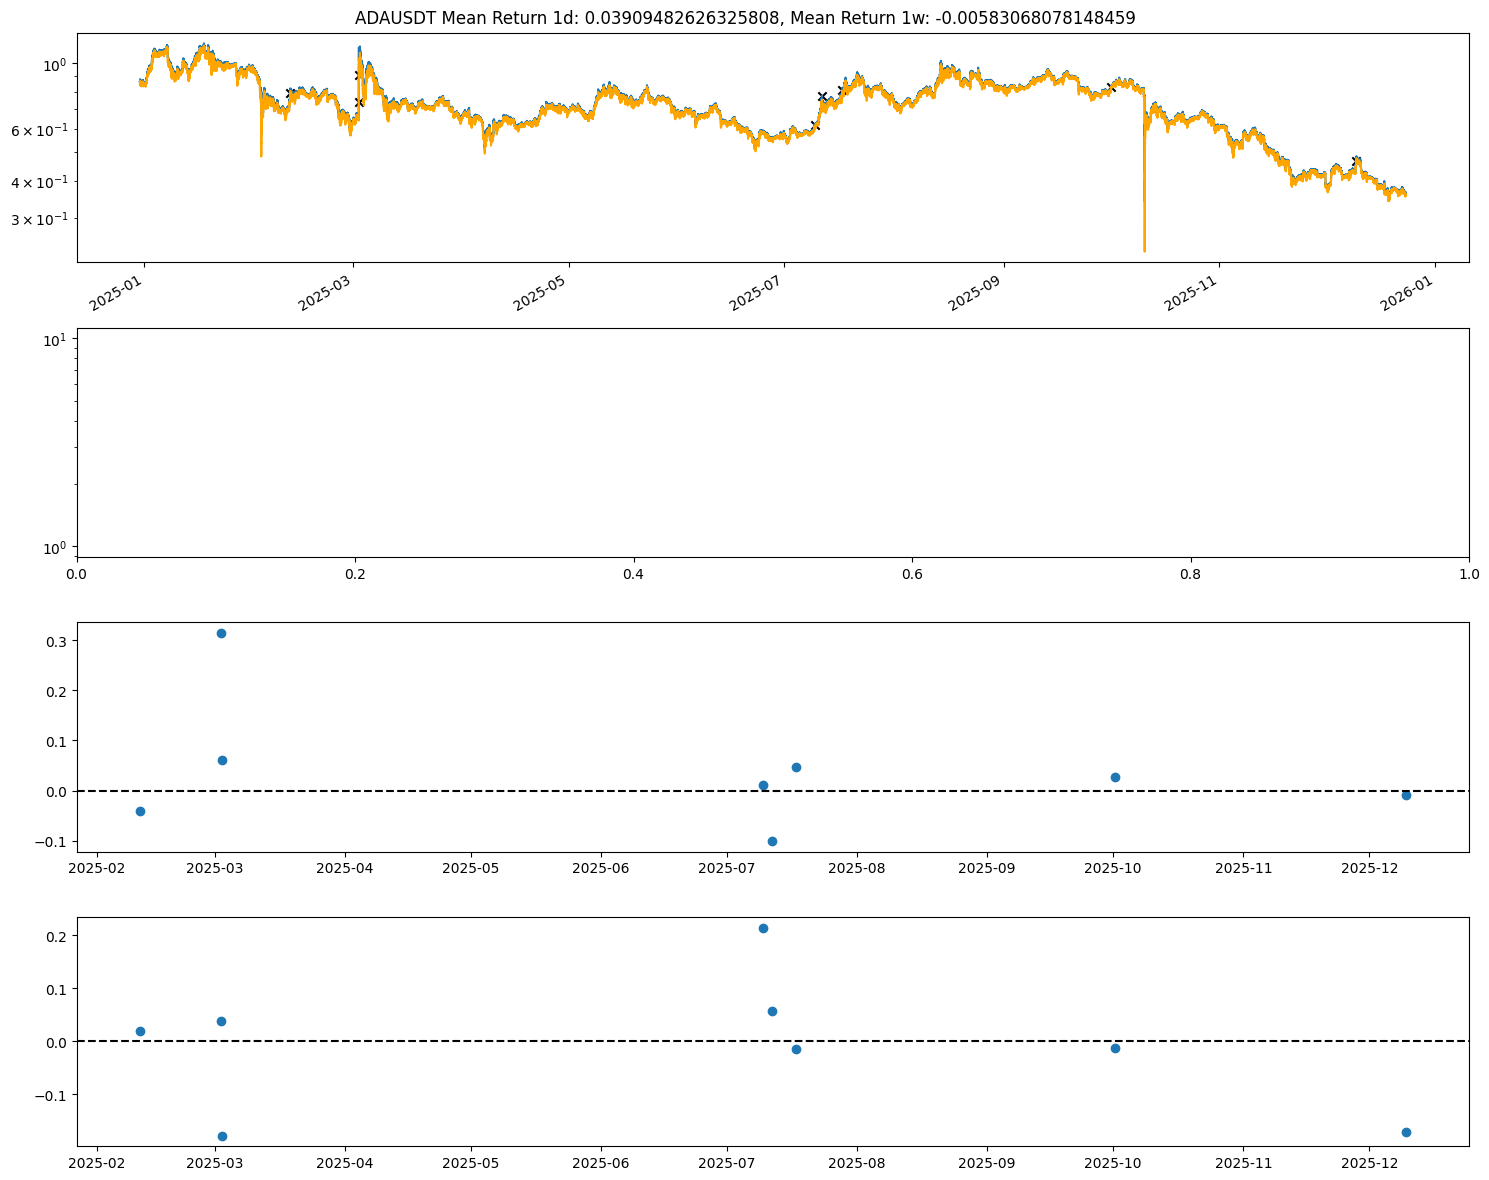

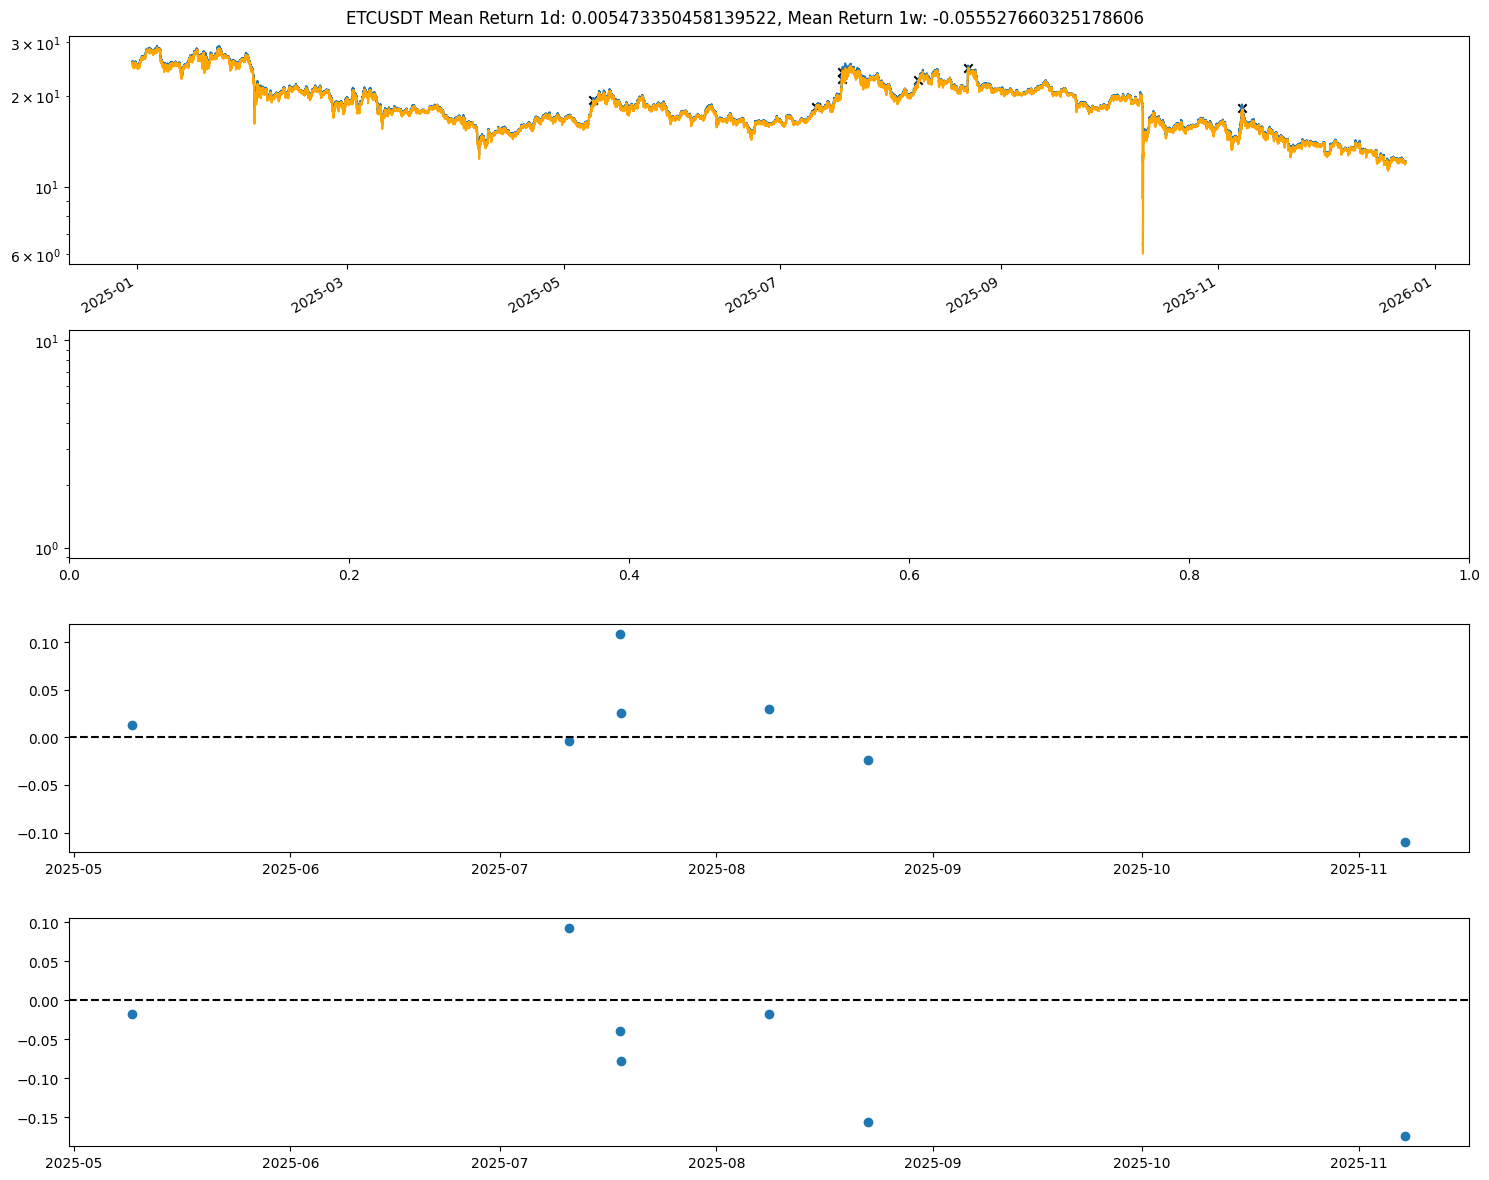

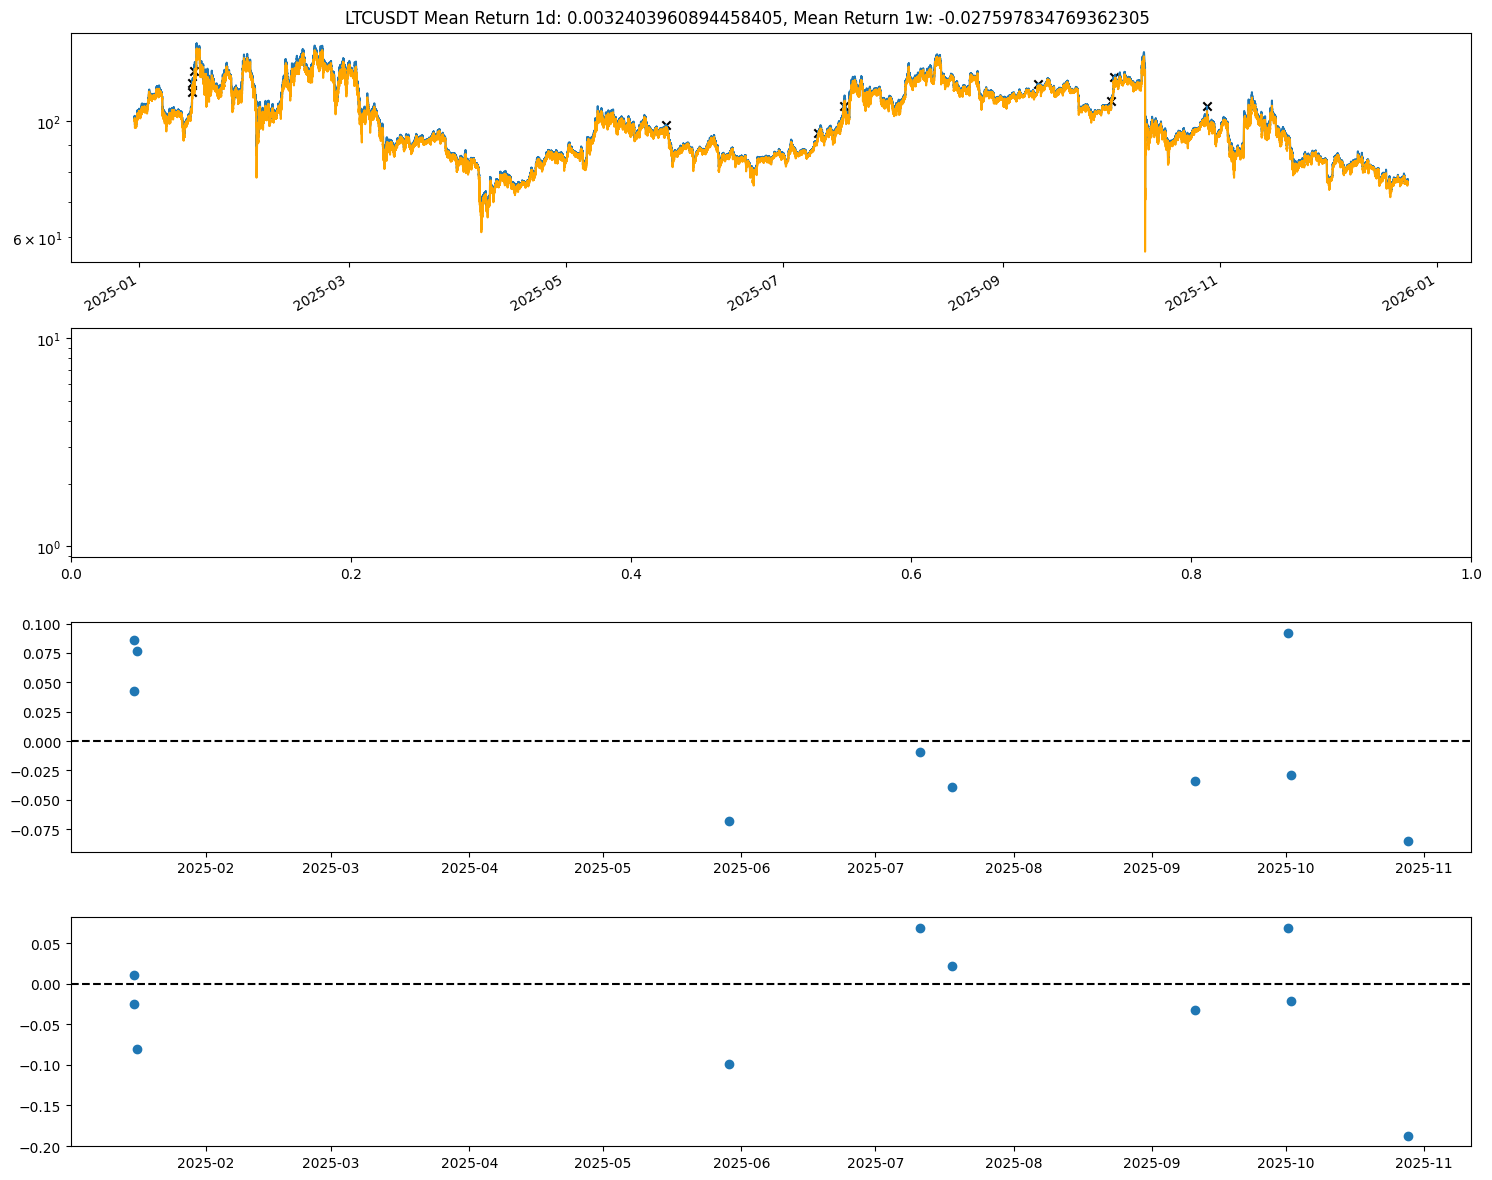

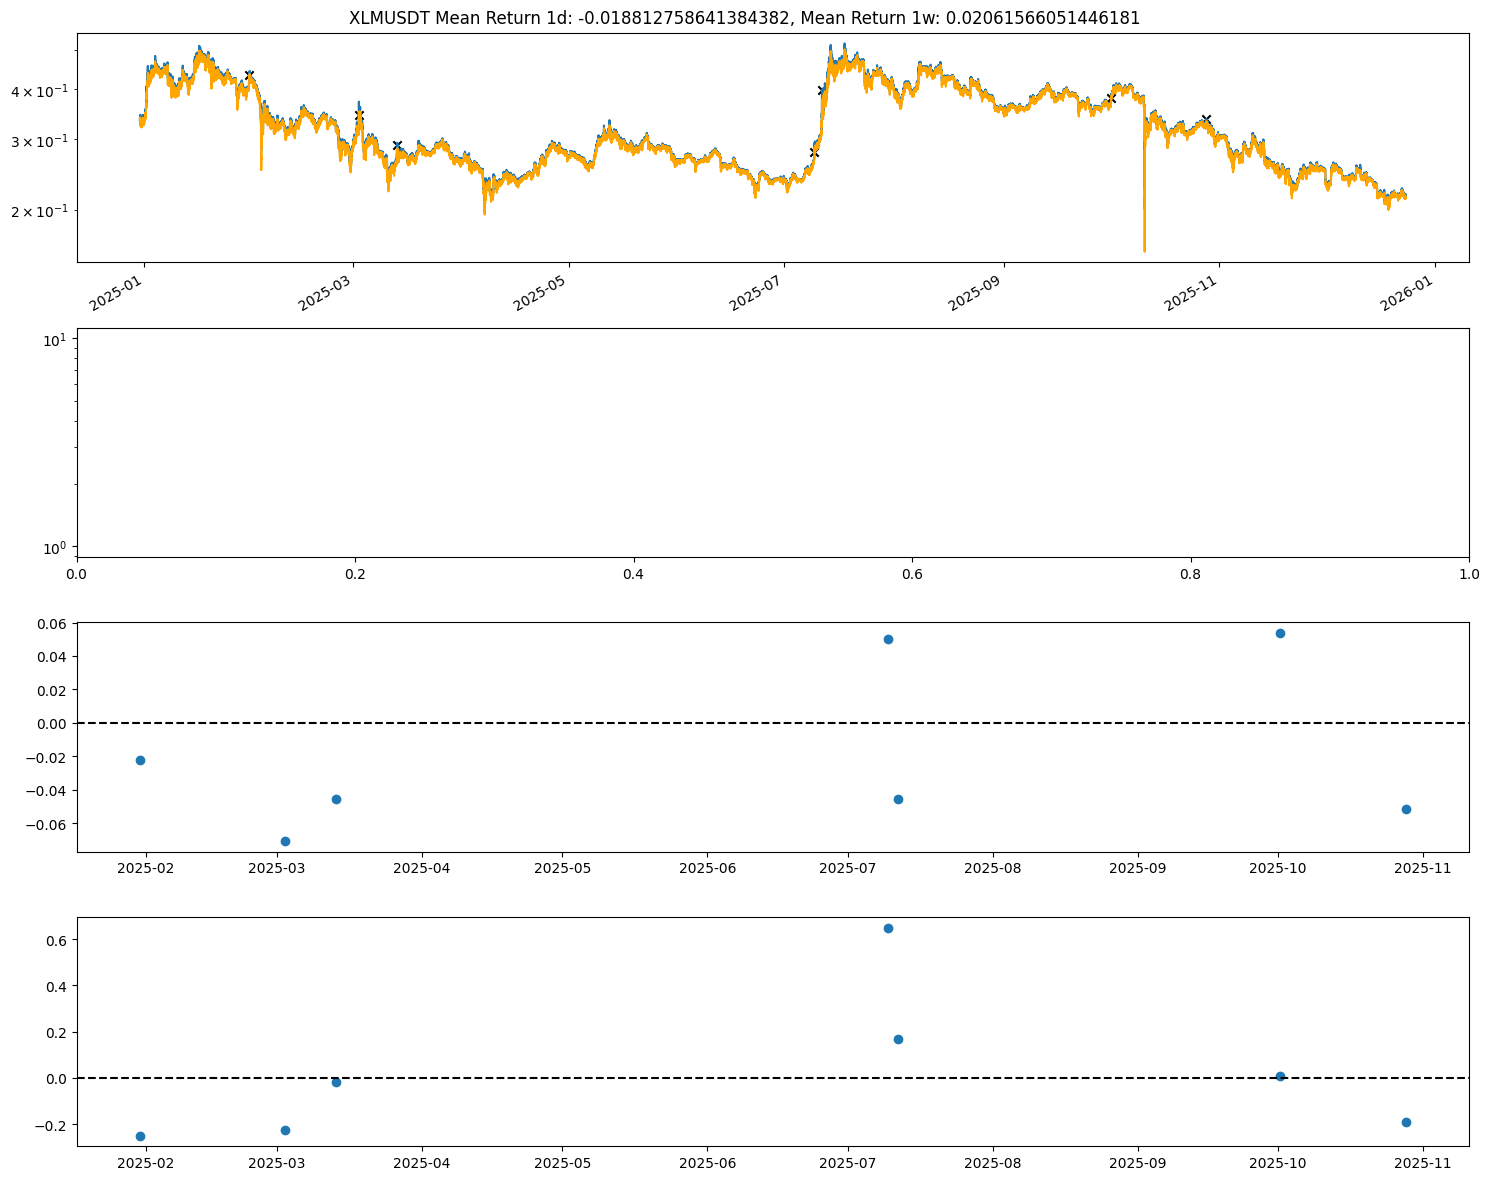

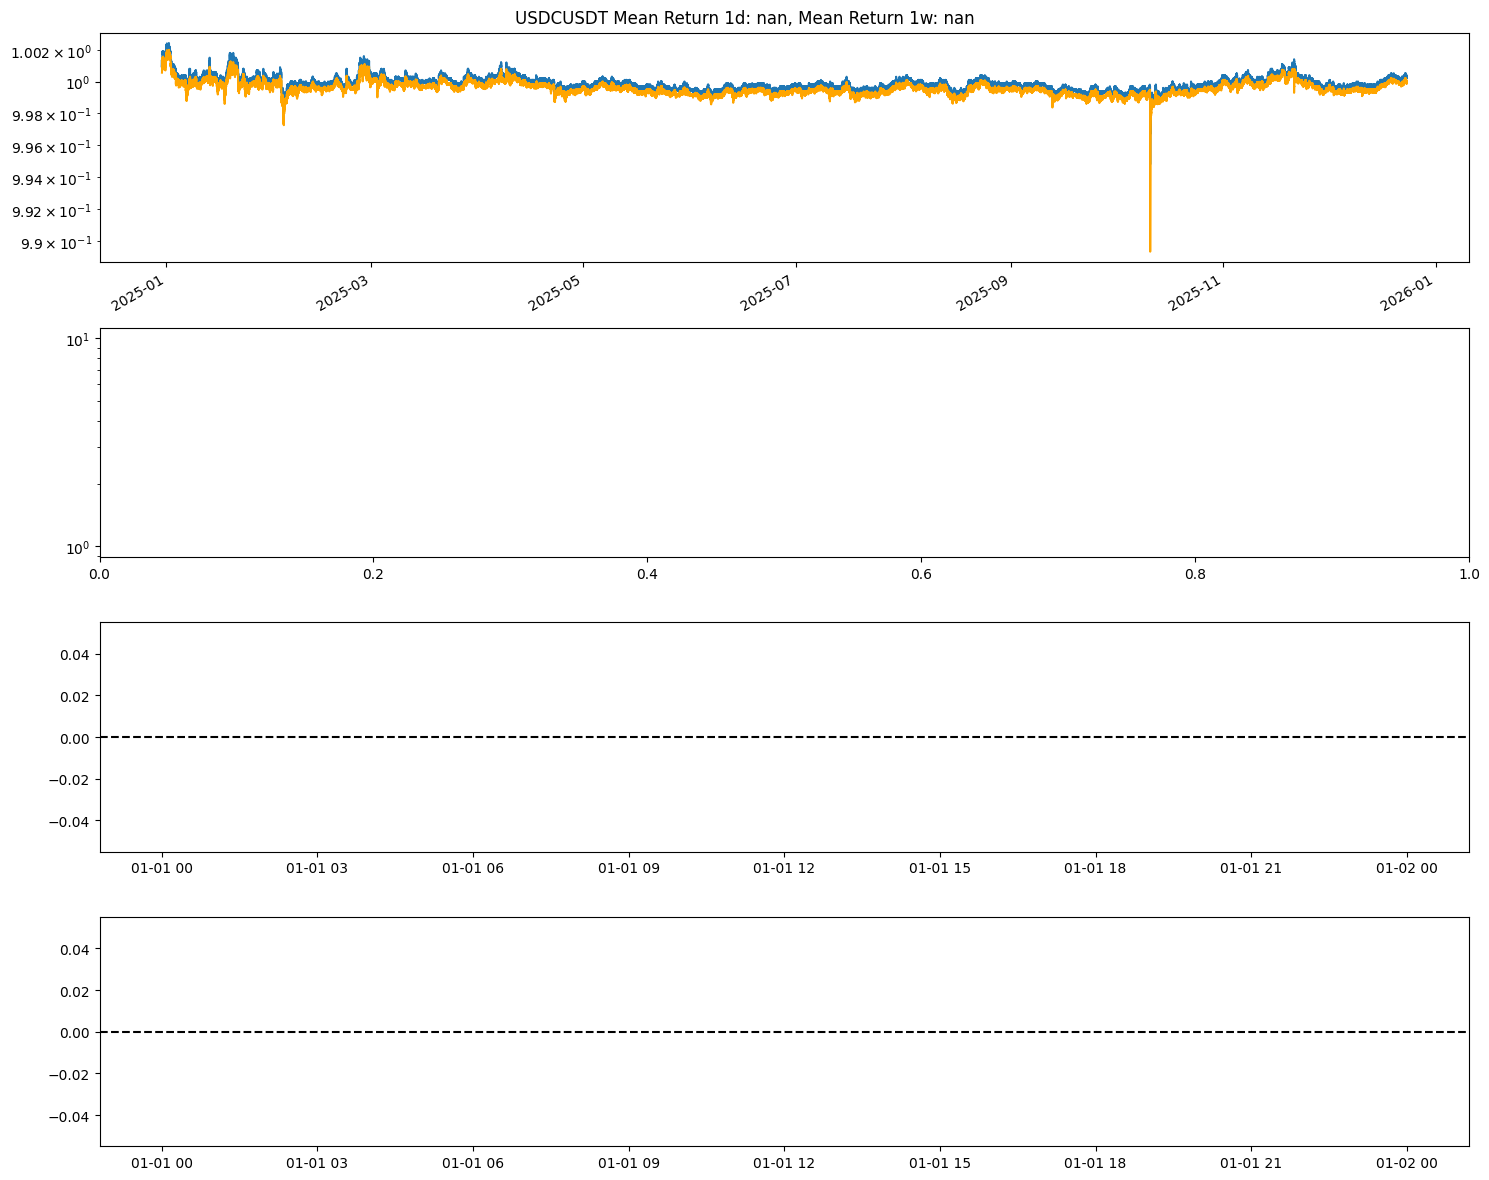

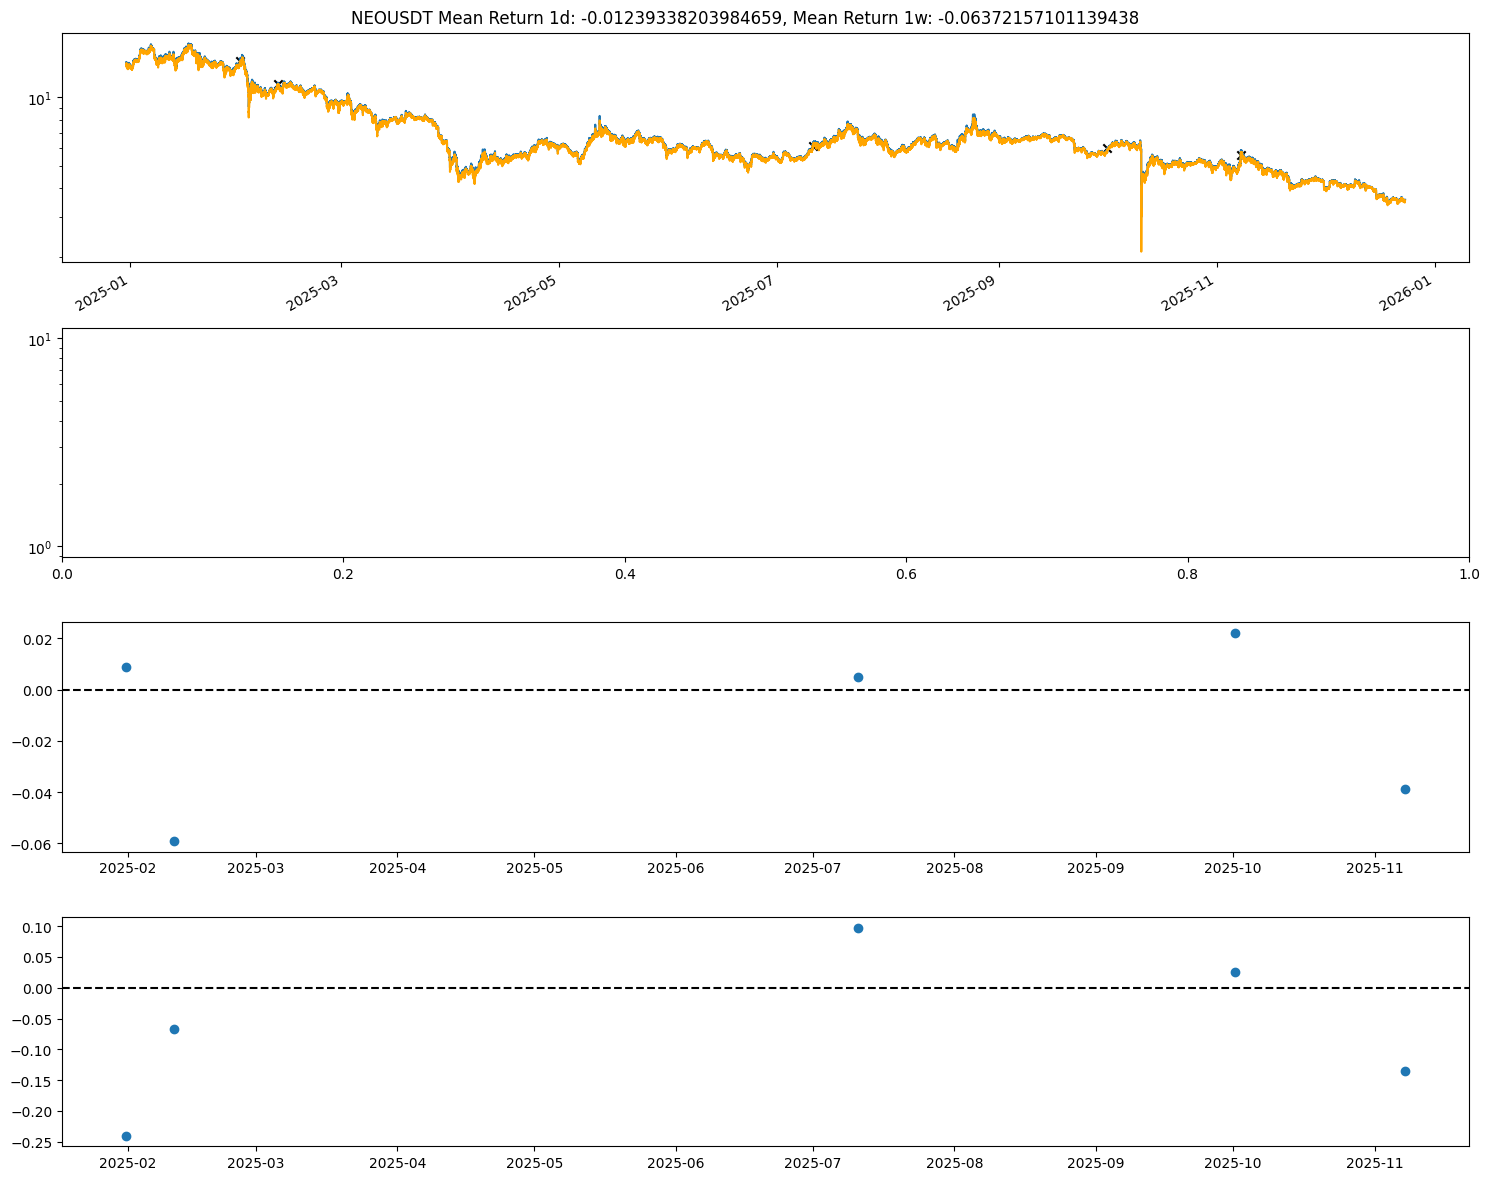

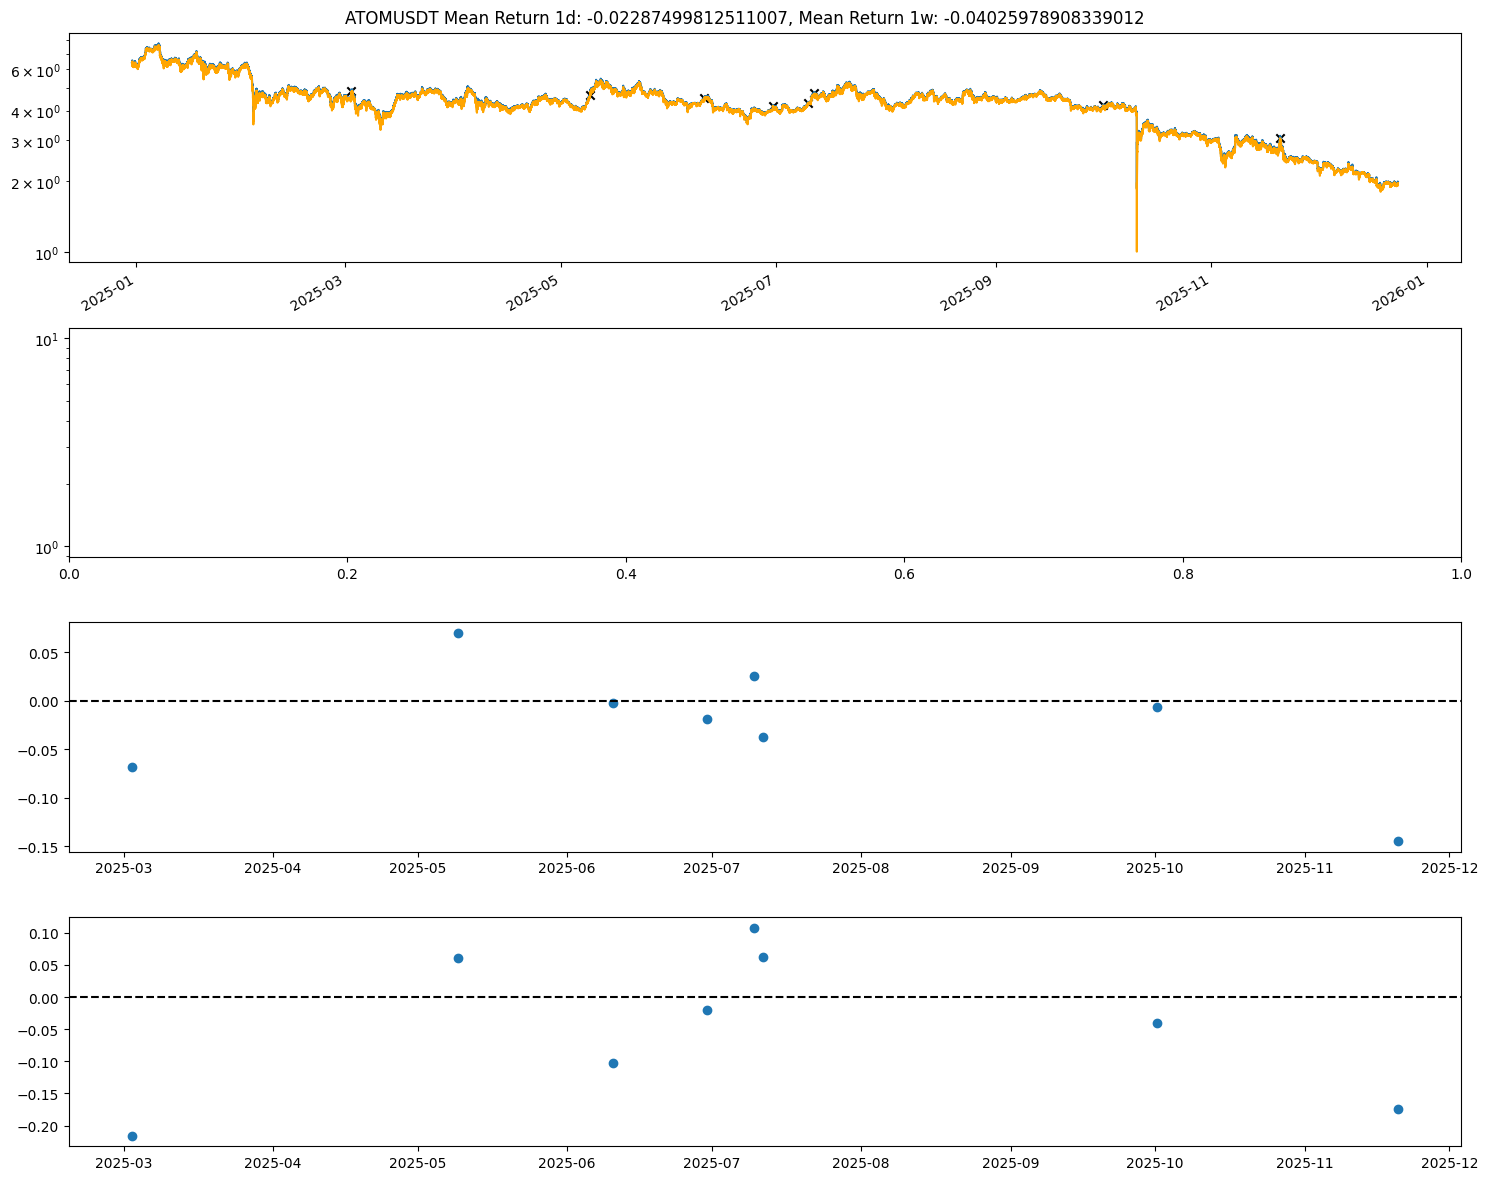

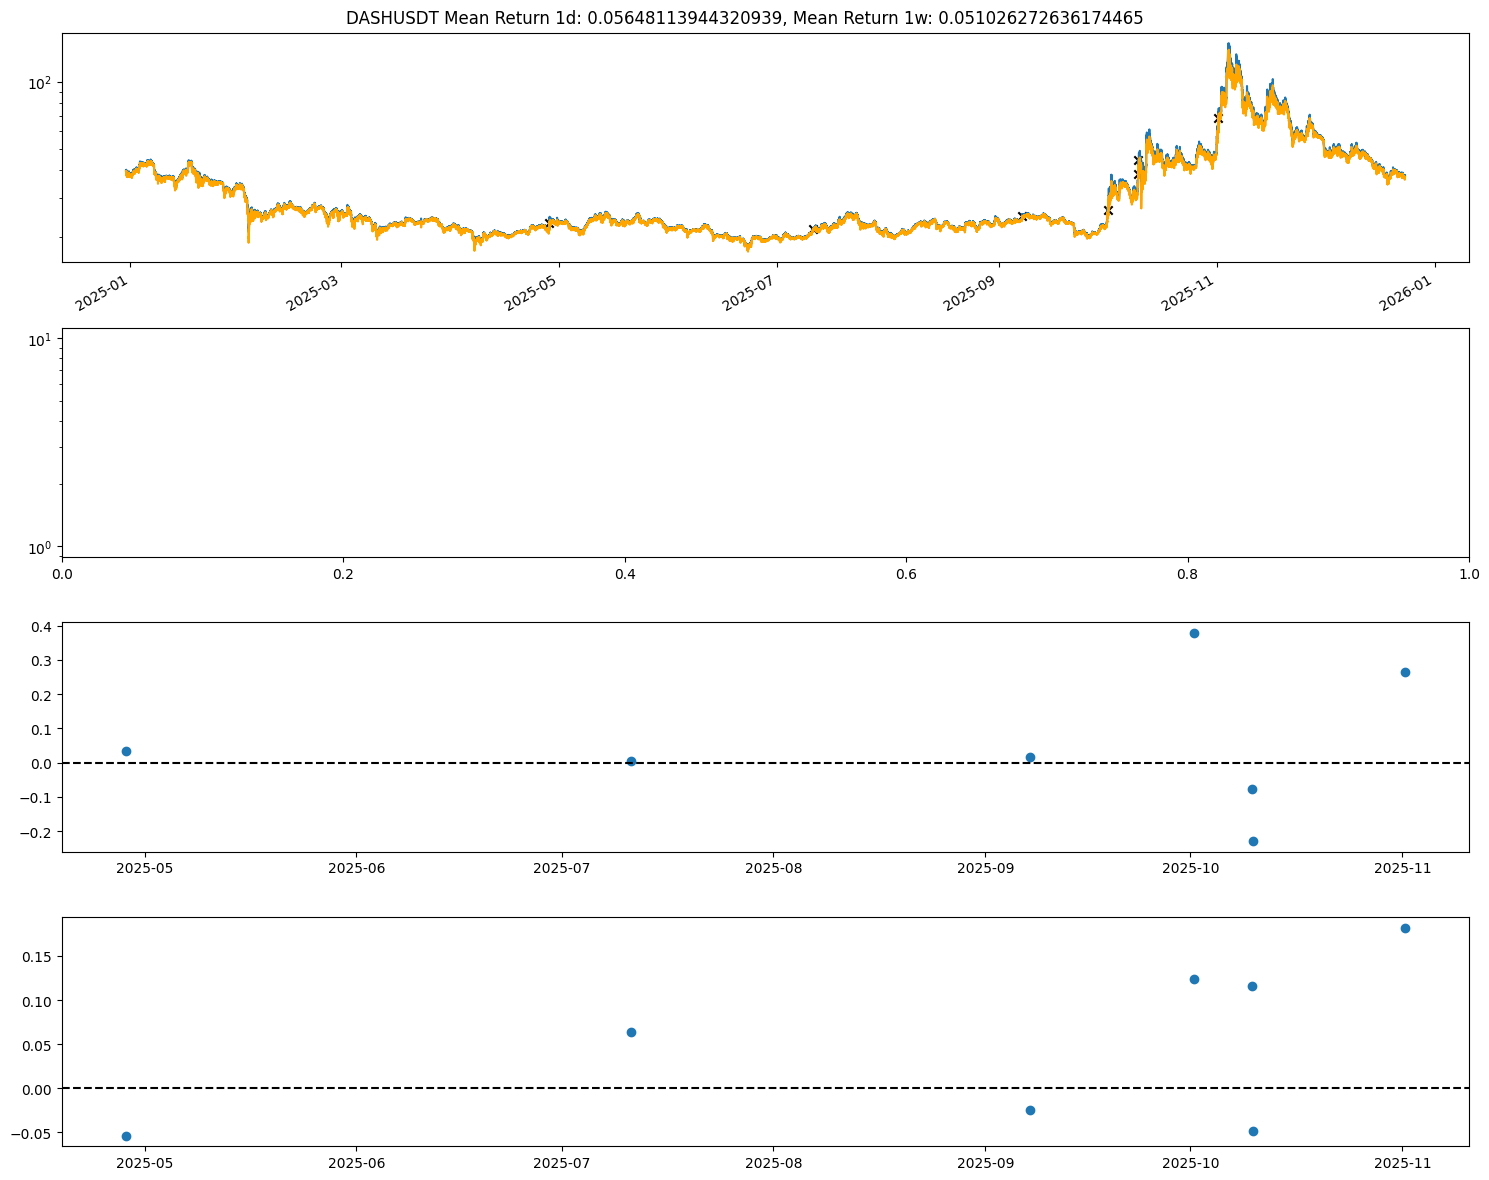

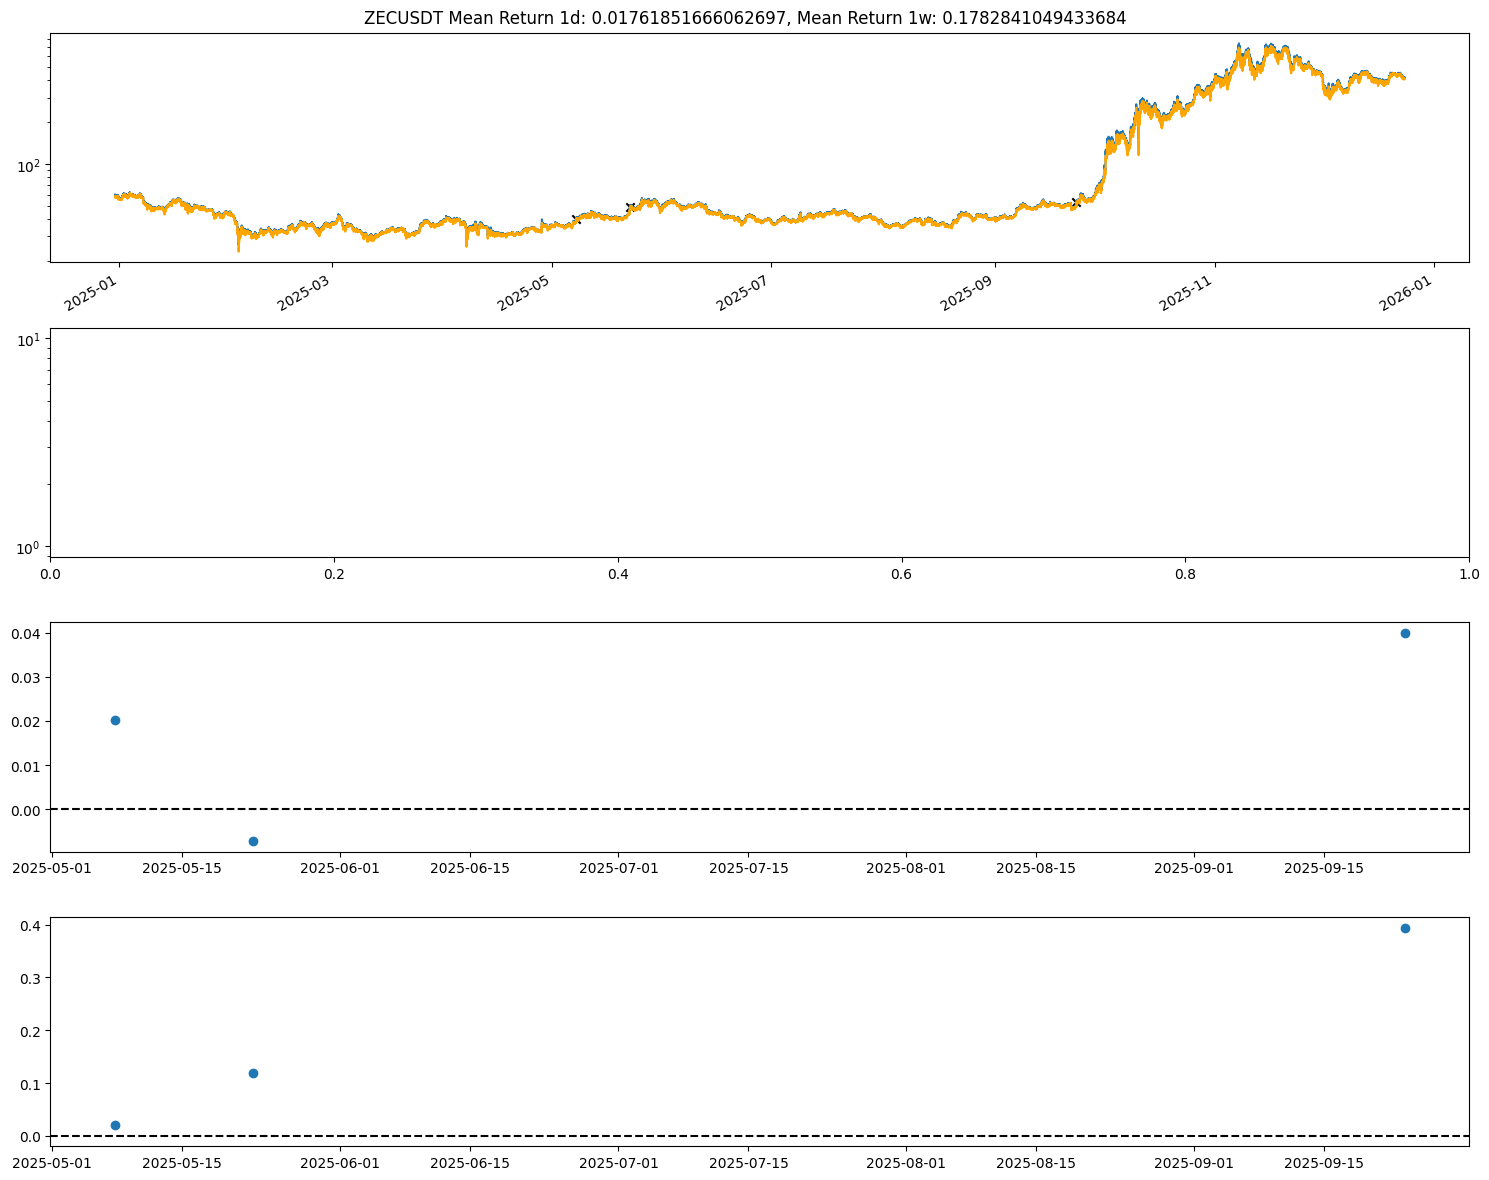

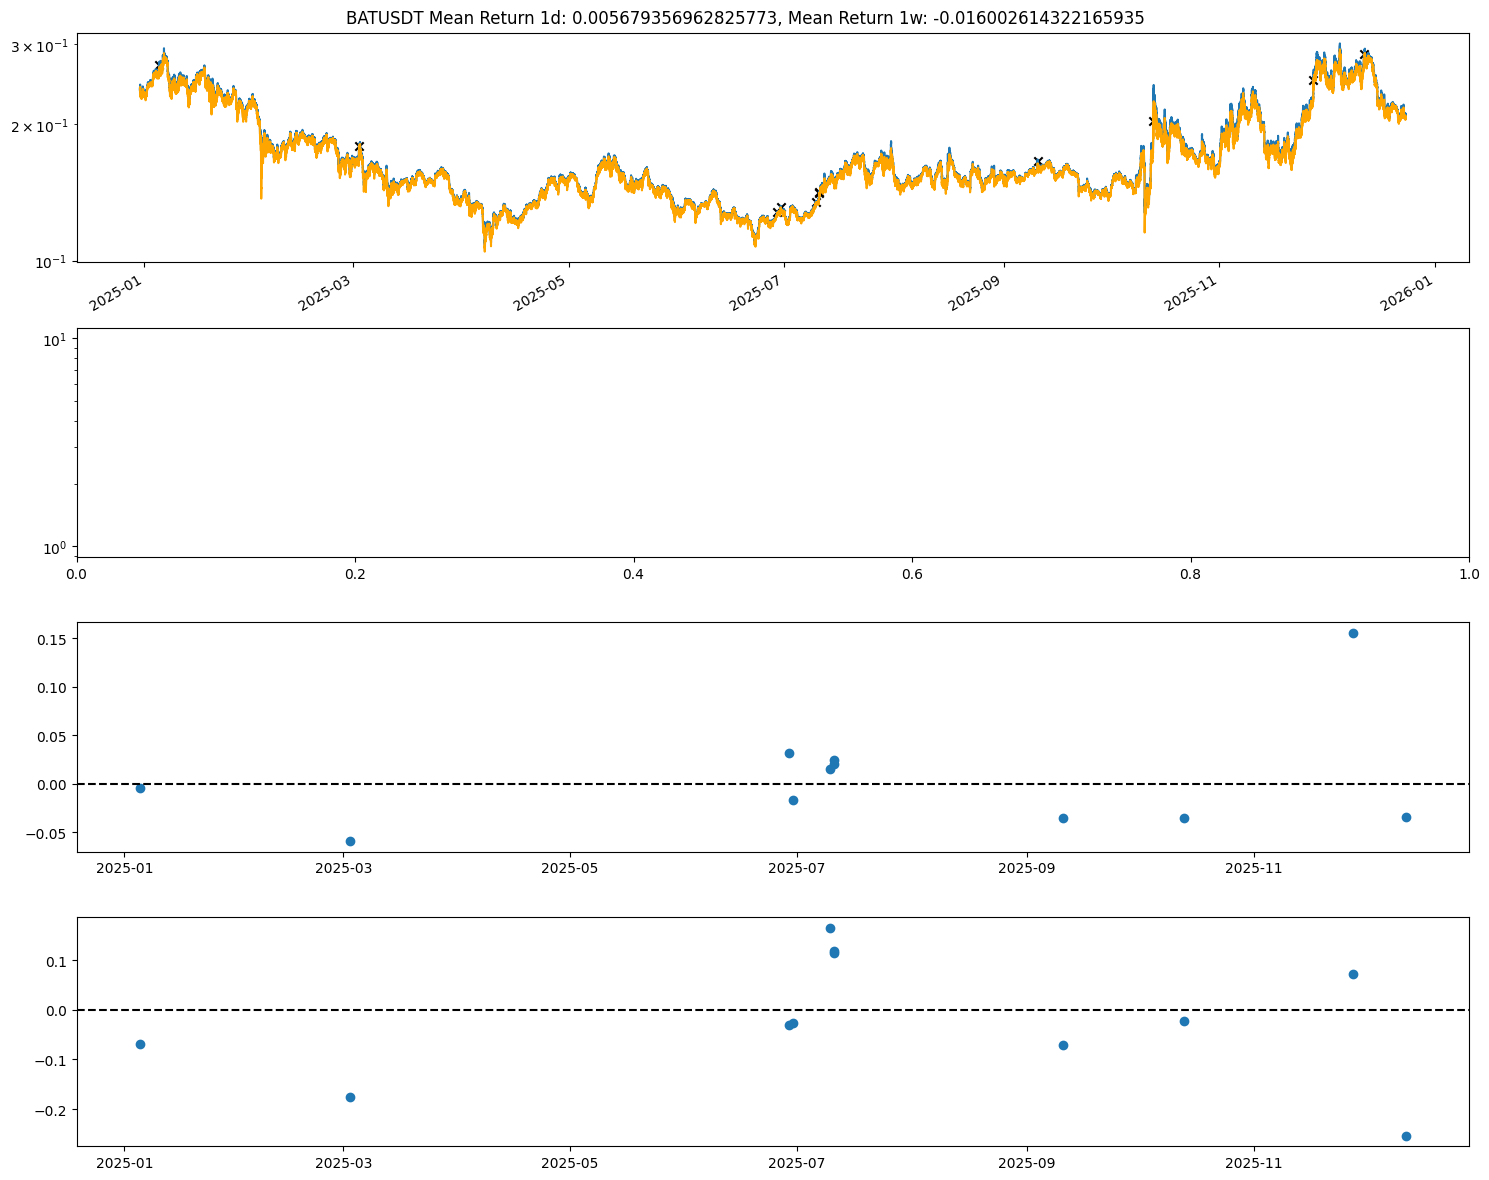

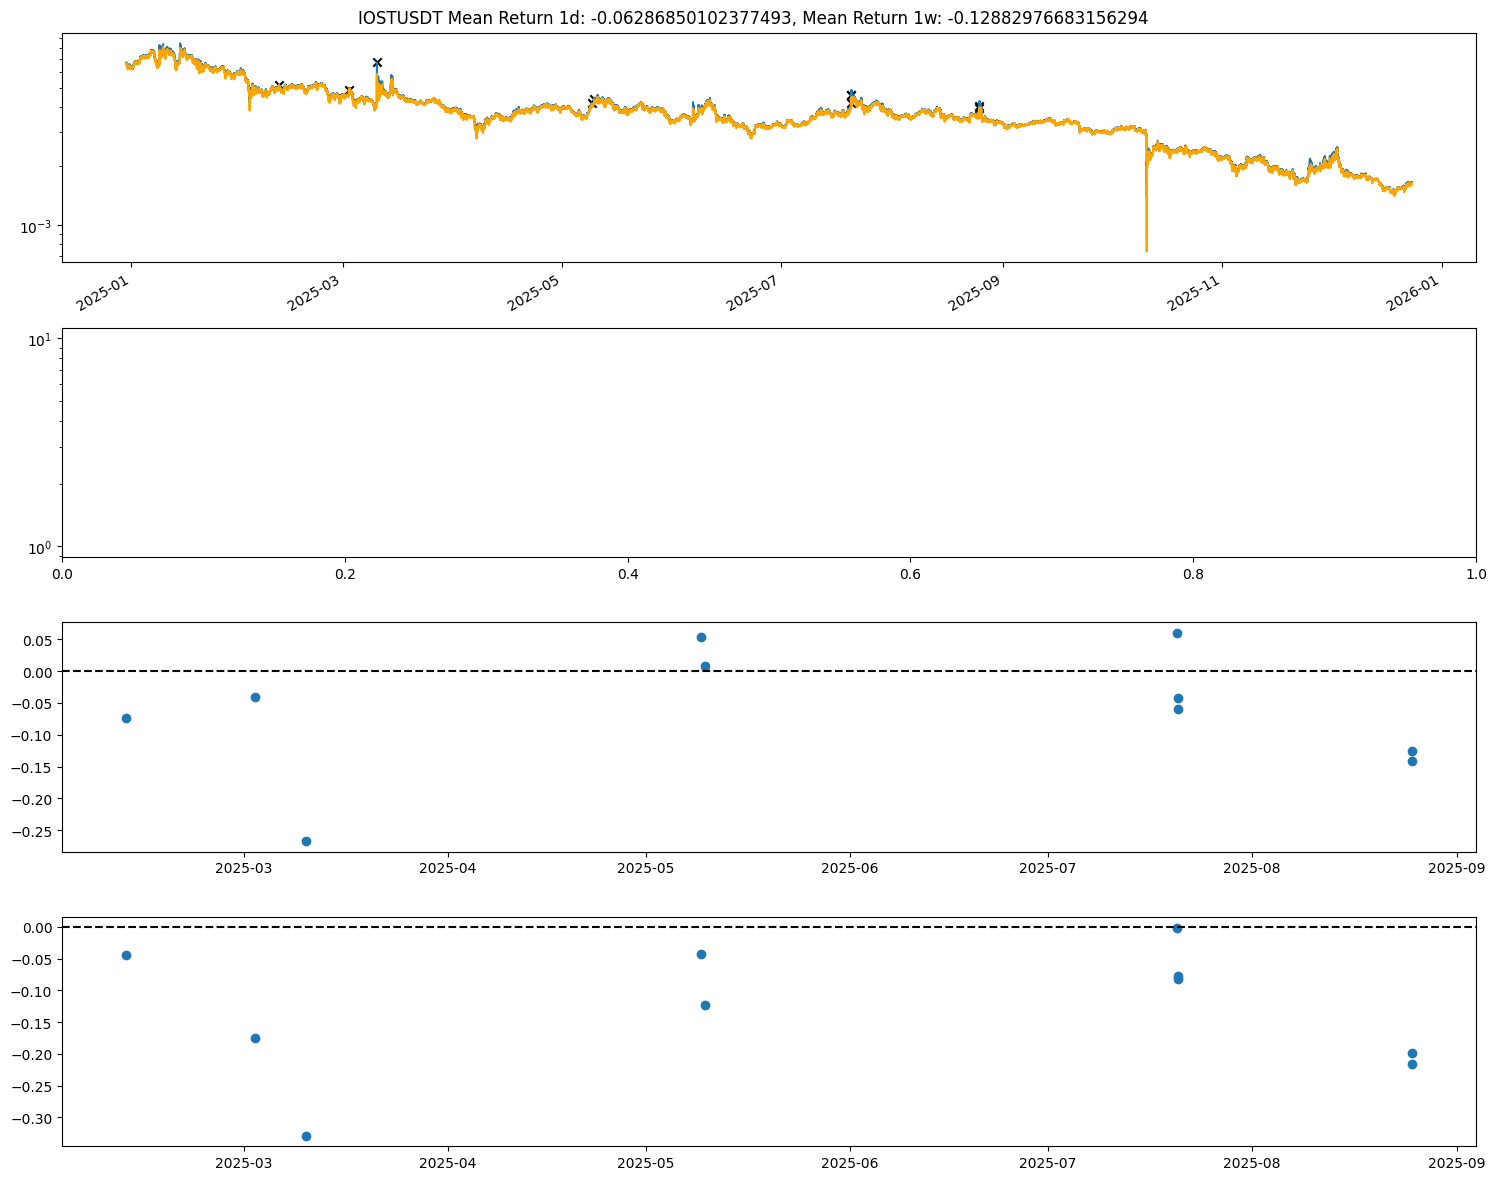

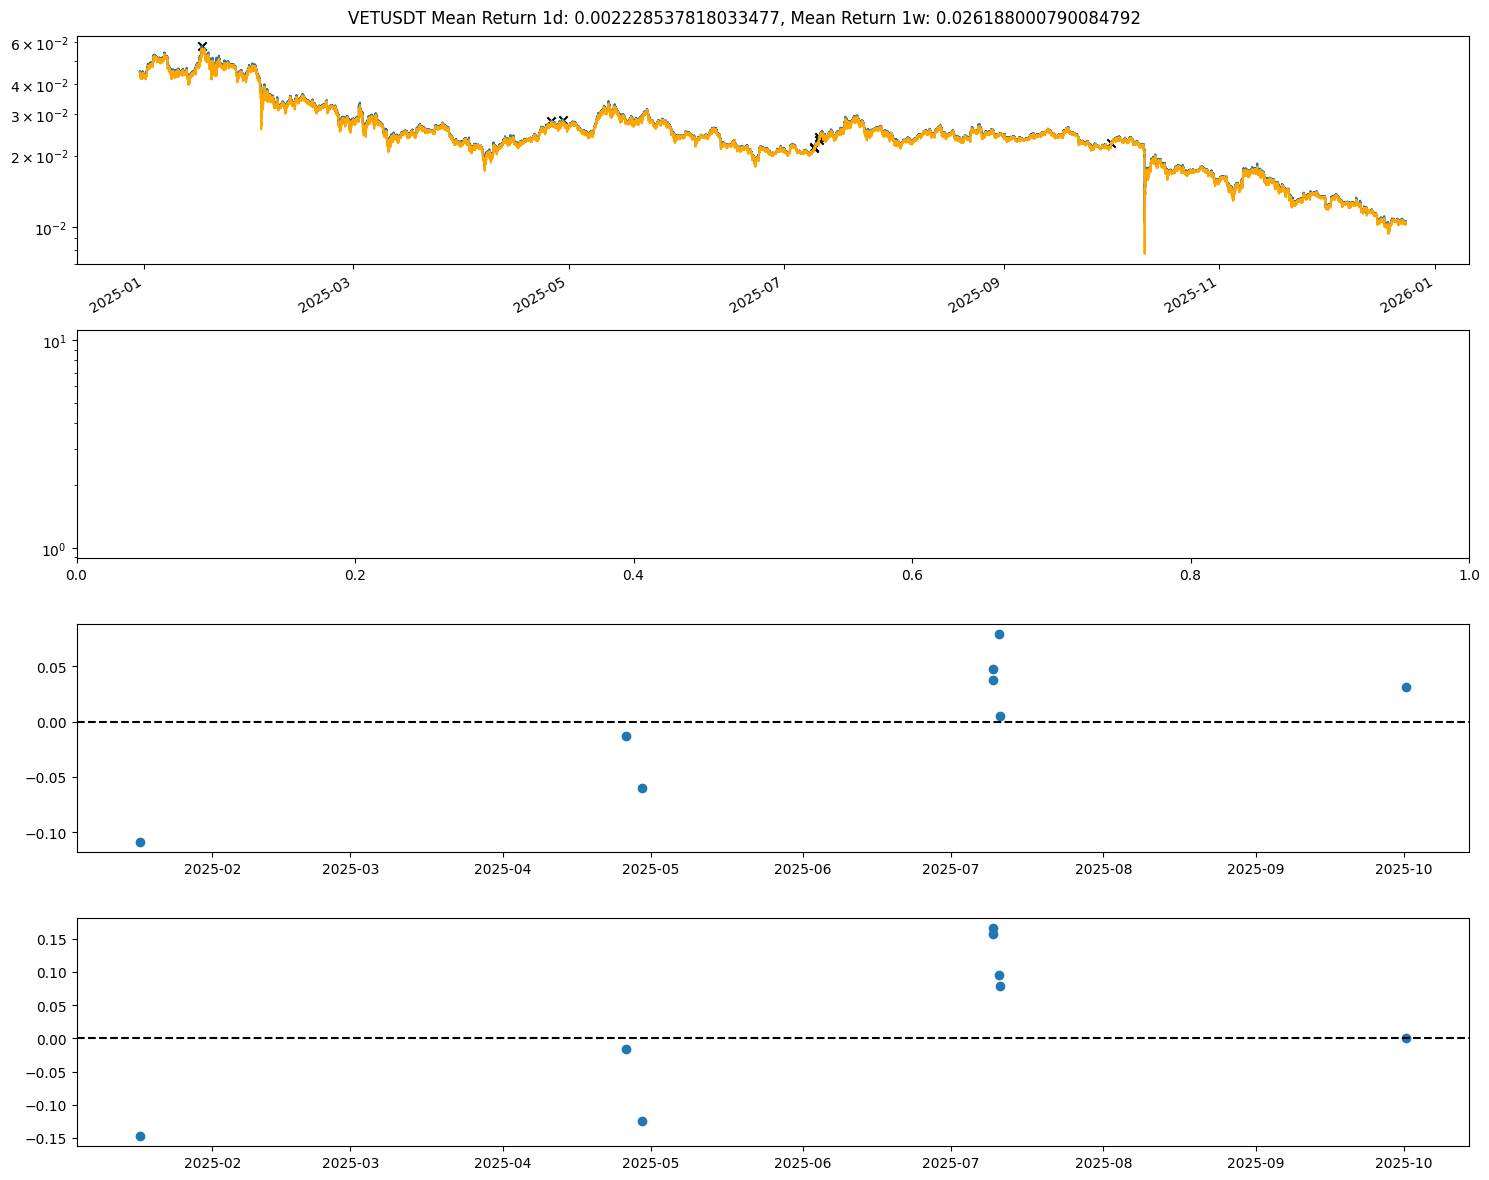

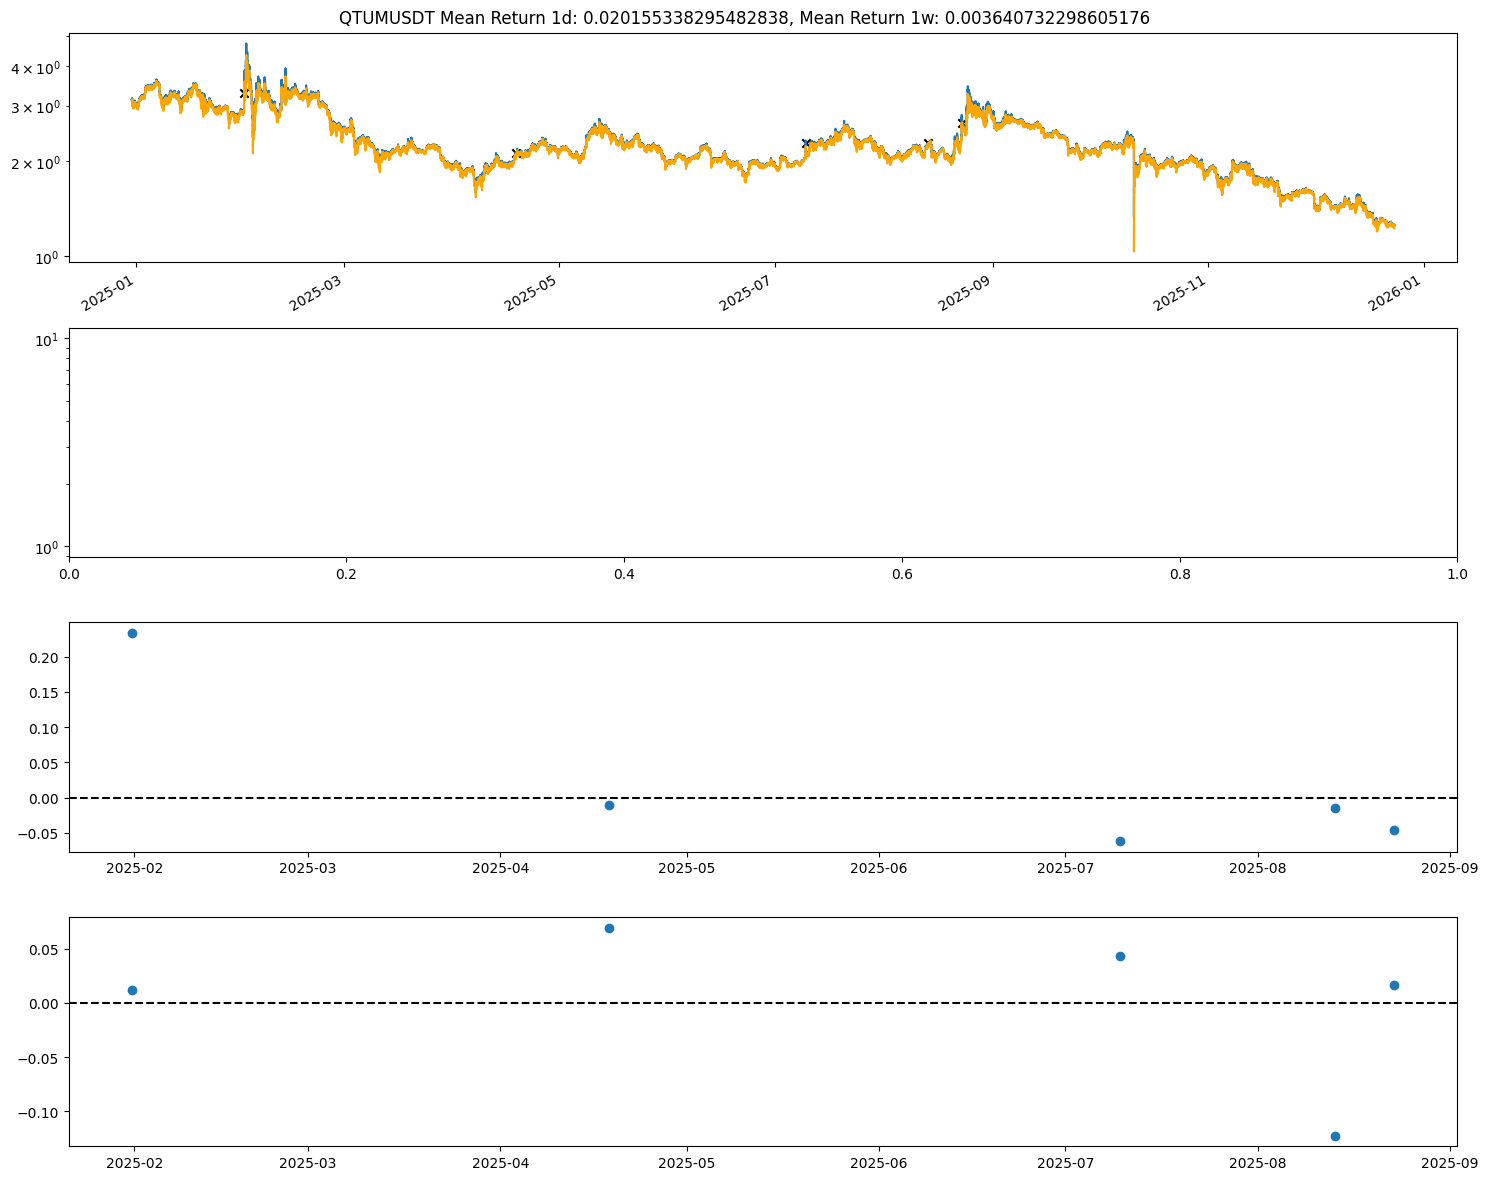

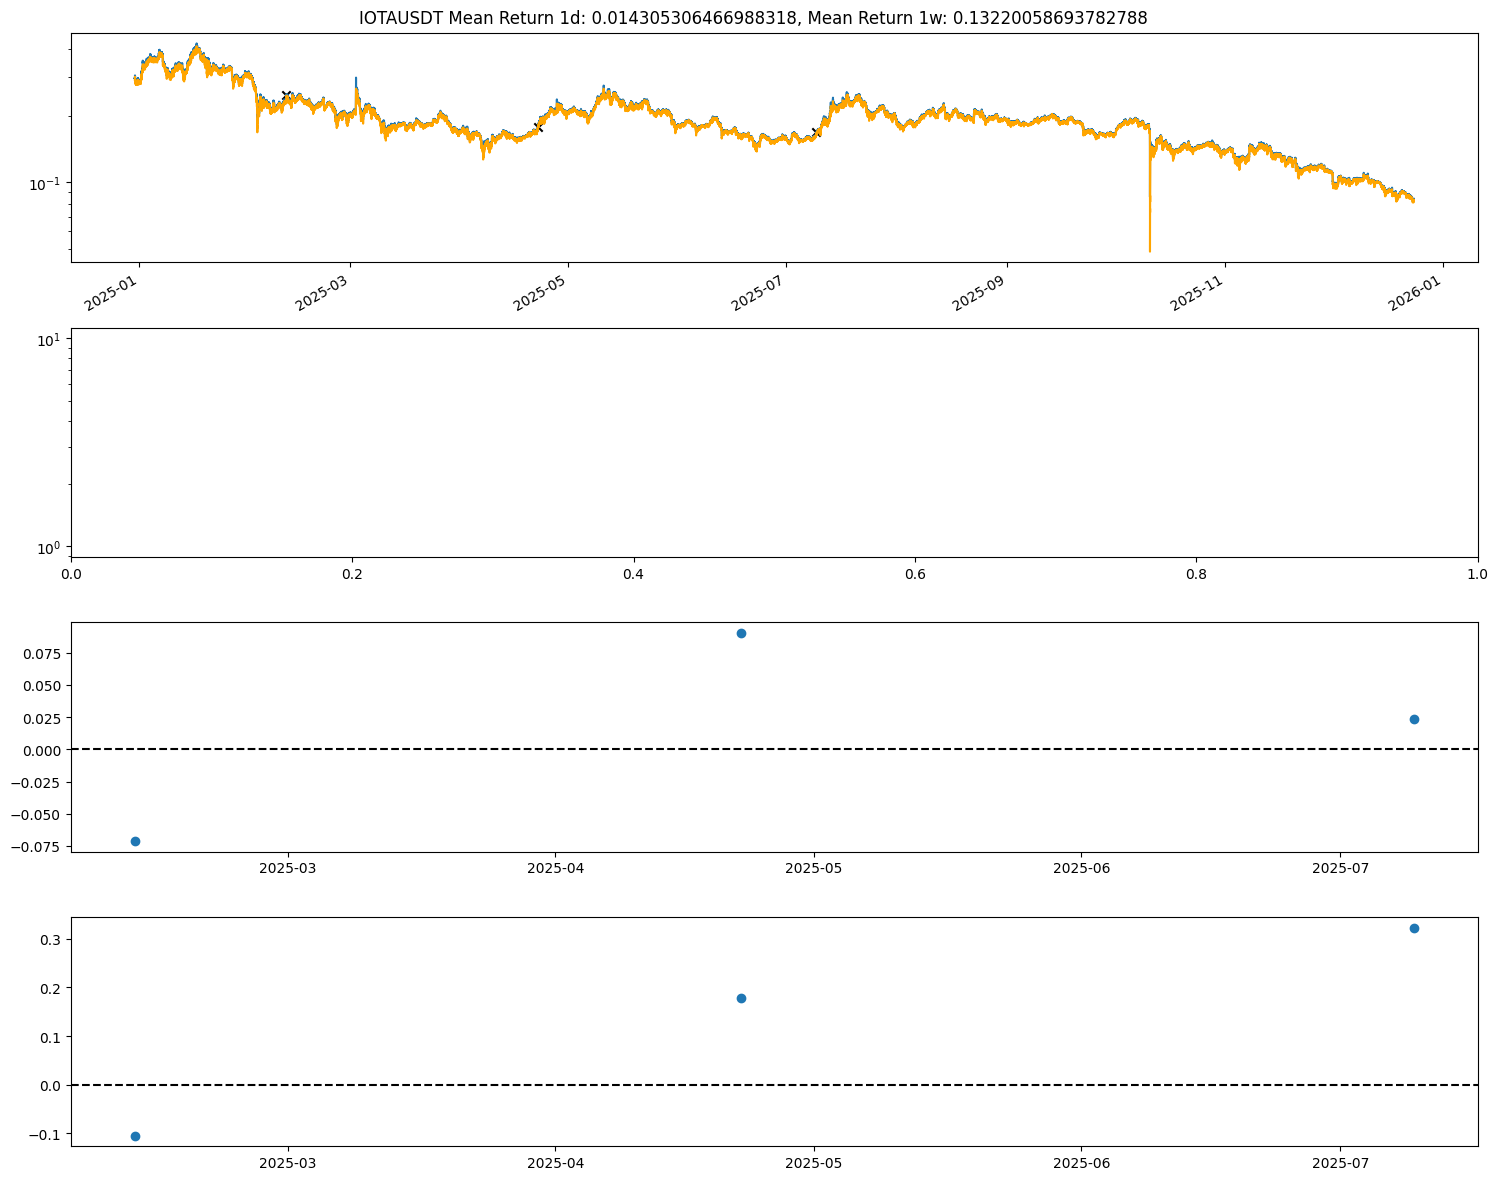

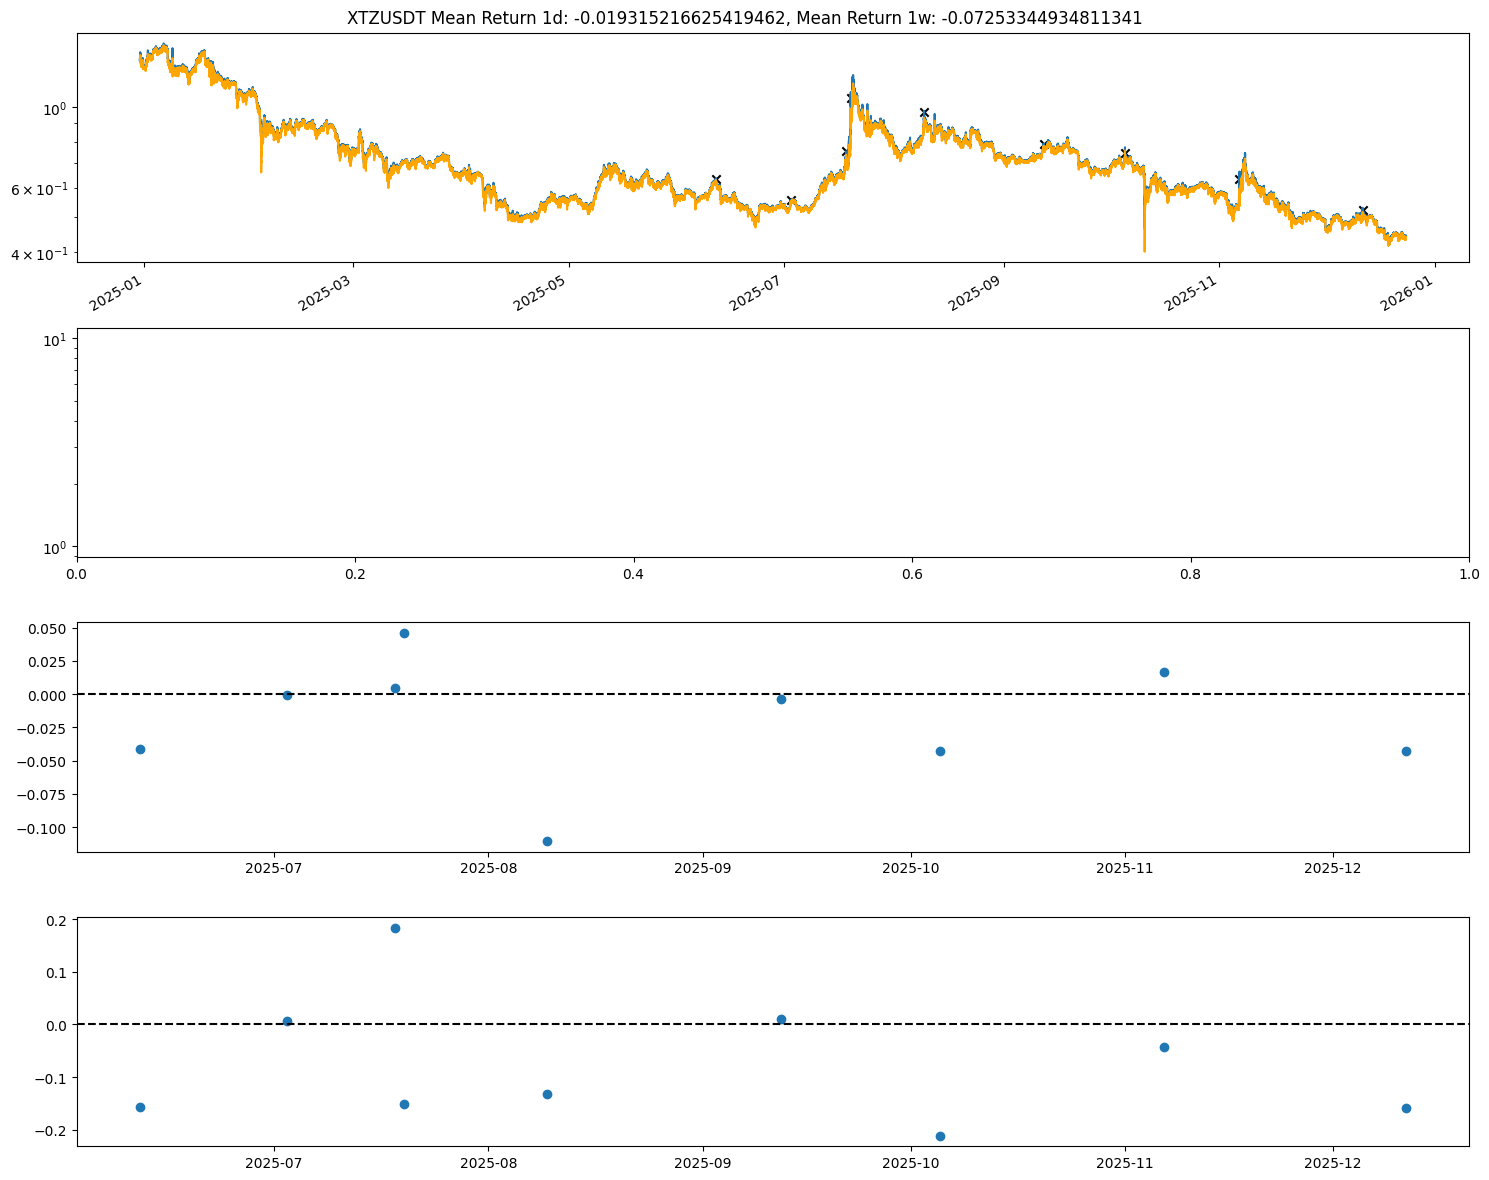

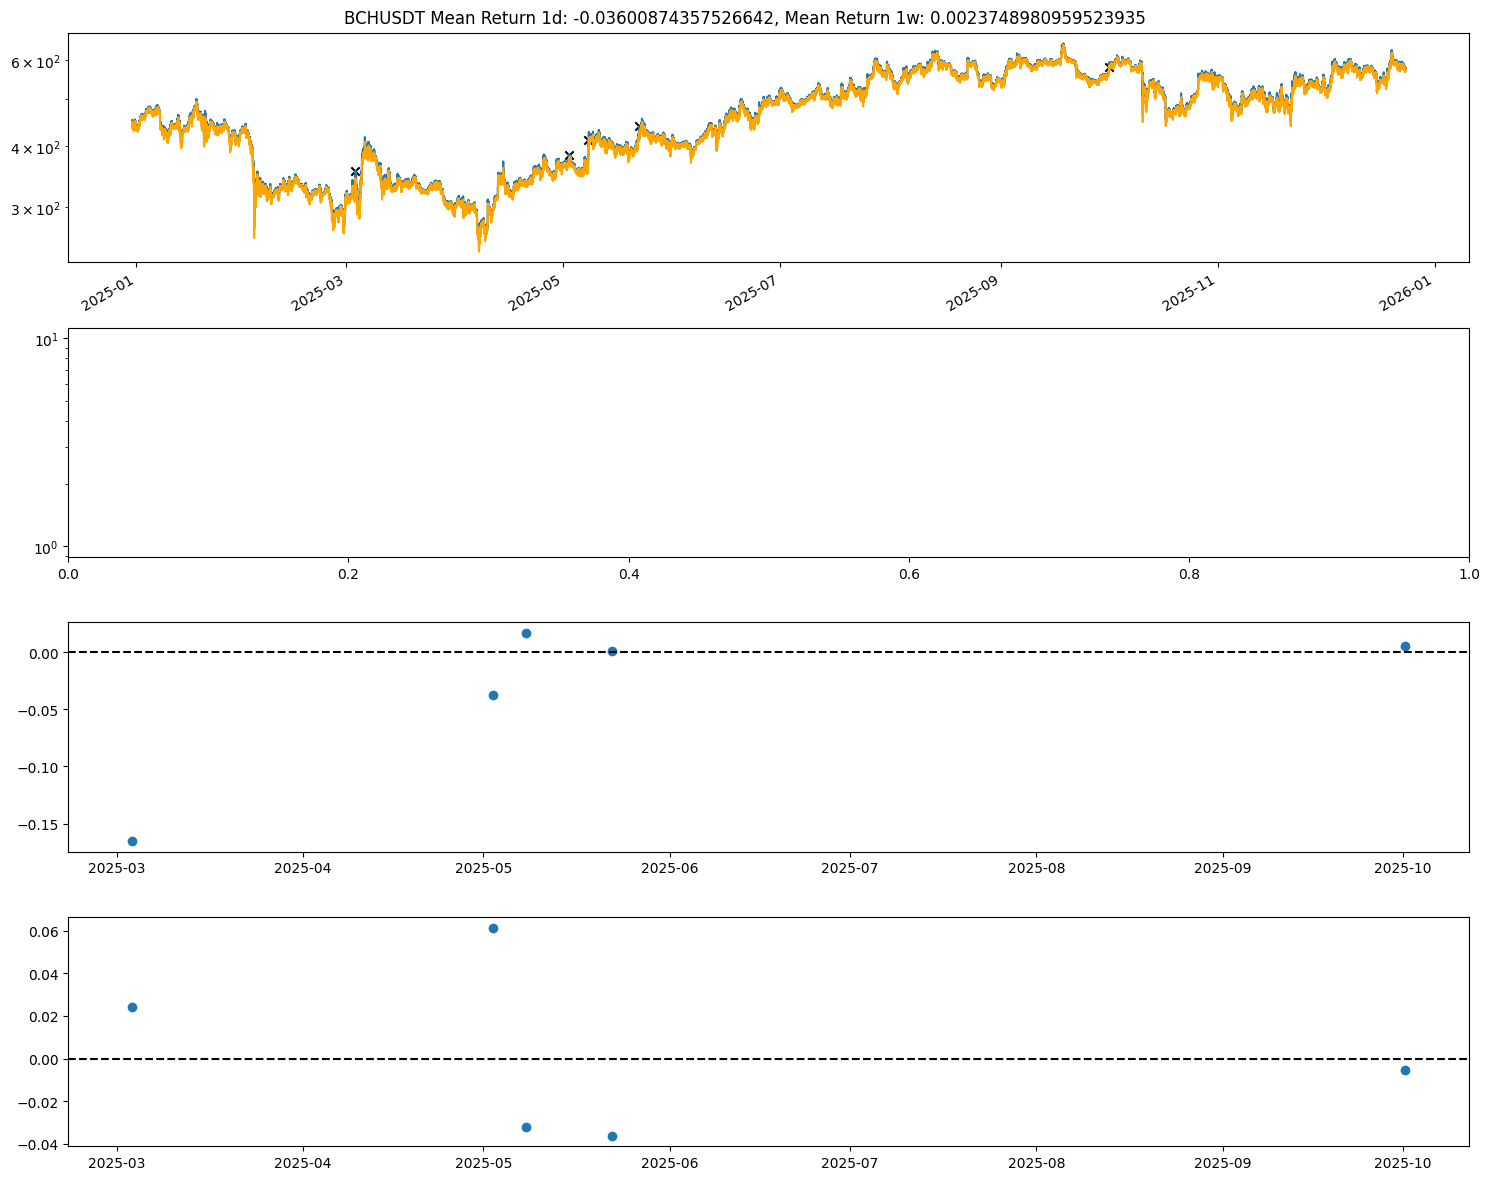

In [127]:
import talib as ta

stats = {}

for ticker, df in datas_execution.items():

    fig, axs = plt.subplots(4, 1, figsize=(15,12))

    df_signal = datas_signal[ticker]

    df['ret_fwd_1d'] = df['Close'].pct_change(periods=12*24).shift(-12*24)
    df['ret_fwd_1w'] = df['Close'].pct_change(periods=12*24*7).shift(-12*24*7)

    signal_execution_matches = {}

    signal_names = [filter.NAME for filter in signal_filters]
    execution_names = [filter.NAME for filter in execution_filters]
    last_signal_date = None
    for close_date in df.index[10:-10]:
        signal = df_signal.loc[:close_date, signal_names].iloc[-1]
        signal_date = signal.name
        if signal.all(): 
            if df.loc[close_date, execution_names].all():
                if signal_date != last_signal_date:
                    signal_execution_matches[close_date] = True
                    last_signal_date = signal_date
                continue
        signal_execution_matches[close_date] = False
        
    df = pd.concat([df, pd.Series(signal_execution_matches, name='signal_execution_matches')], axis=1).dropna()
    atr = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Close'].plot(ax=axs[0])
    (df['Close'] - (atr*3)).plot(ax=axs[0], label='Close - 3*ATR', color='orange')

    axs[0].scatter(df.loc[df['signal_execution_matches']].index, df.loc[df['signal_execution_matches'], 'Close'], marker='x', label='Buys', color='black')
    axs[0].set_yscale('log')

    axs[1].set_yscale('log')

    axs[2].scatter(df.loc[df['signal_execution_matches']].index, df.loc[df['signal_execution_matches'], 'ret_fwd_1d'], label='1d Return')
    axs[2].axhline(0, color='black', linestyle='--')

    axs[3].scatter(df.loc[df['signal_execution_matches']].index, df.loc[df['signal_execution_matches'], 'ret_fwd_1w'], label='1w Return')
    axs[3].axhline(0, color='black', linestyle='--')

    signal_dates_returns_1d = df.loc[df['signal_execution_matches'], 'ret_fwd_1d']
    signal_dates_returns_1w = df.loc[df['signal_execution_matches'], 'ret_fwd_1w']

    stats[ticker] = {
        'mean_return_1d': signal_dates_returns_1d.mean(),
        'median_return_1d': signal_dates_returns_1d.median(),
        'mean_return_1w': signal_dates_returns_1w.mean(),
        'median_return_1w': signal_dates_returns_1w.median(),
        'num_signals': len(signal_dates_returns_1d),
    }

    fig.suptitle(f"{ticker} Mean Return 1d: {stats[ticker]['mean_return_1d']}, Mean Return 1w: {stats[ticker]['mean_return_1w']}")
    fig.tight_layout()

    plt.show()


In [131]:
pd.DataFrame(stats).T.sort_values('mean_return_1w', ascending=False)

mean_return_1d  median_return_1d  mean_return_1w  median_return_1w  \
ZECUSDT         0.017619          0.020134        0.178284          0.119077   
IOTAUSDT        0.014305          0.023795        0.132201          0.179012   
ETHUSDT         0.053425          0.022092        0.130060          0.118102   
DASHUSDT        0.056481          0.017311        0.051026          0.063616   
LINKUSDT        0.013742          0.007759        0.045718          0.040870   
XRPUSDT        -0.010522         -0.011792        0.036418          0.025532   
VETUSDT         0.002229          0.017970        0.026188          0.039342   
TRXUSDT         0.019269          0.026337        0.023126          0.018567   
XLMUSDT        -0.018813         -0.045477        0.020616         -0.018288   
BNBUSDT        -0.008059         -0.008922        0.016764          0.049833   
BTCUSDT         0.004496          0.010623        0.006360          0.005322   
QTUMUSDT        0.020155         -0.014860        0.003641          0.016239   
BCHUSDT        -0.036009          0.001139        0.002375         -0.005500   
ADAUSDT         0.039095          0.019333       -0.005831          0.003354   
BATUSDT         0.005679         -0.004079       -0.016003         -0.026677   
LTCUSDT         0.003240         -0.019343       -0.027598         -0.023280   
ONTUSDT         0.051596          0.016496       -0.038128         -0.011258   
ATOMUSDT       -0.022875         -0.012591       -0.040260         -0.030253   
ETCUSDT         0.005473          0.012893       -0.055528         -0.038732   
NEOUSDT        -0.012393          0.004886       -0.063722         -0.066144   
XTZUSDT        -0.019315         -0.003299       -0.072533         -0.132762   
IOSTUSDT       -0.062869         -0.051001       -0.128830         -0.103037   
USDCUSDT             NaN               NaN             NaN               NaN   

          num_signals  
ZECUSDT           3.0  
IOTAUSDT          3.0  
ETHUSDT          10.0  
DASHUSDT          7.0  
LINKUSDT          6.0  
XRPUSDT          10.0  
VETUSDT           8.0  
TRXUSDT           4.0  
XLMUSDT           7.0  
BNBUSDT           5.0  
BTCUSDT          12.0  
QTUMUSDT          5.0  
BCHUSDT           5.0  
ADAUSDT           8.0  
BATUSDT          11.0  
LTCUSDT          10.0  
ONTUSDT           5.0  
ATOMUSDT          8.0  
ETCUSDT           7.0  
NEOUSDT           5.0  
XTZUSDT           9.0  
IOSTUSDT         10.0  
USDCUSDT          0.0

In [133]:
pd.DataFrame(stats).T.mean()

mean_return_1d      0.005270
median_return_1d    0.001337
mean_return_1w      0.010198
median_return_1w    0.010133
num_signals         6.869565
dtype: float64